<a href="https://colab.research.google.com/github/Utkarsh-Singh-30/bankruptcy_prediction_model/blob/main/BankruptcyPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import missingno as msno
from scipy.io import arff
from google.colab import files

In [2]:
!pip install liac-arff # install the liac-arff package which contains the arff module

from scipy.io import arff # this is not necessary for reading arff files but can be used to convert them to numpy arrays after loading using the liac-arff package

from arff import load # import the load function from the arff module


   # Load ARFF files for years 2, 3, and 4
with open('1year.arff') as f:
  data1 = load(f)
with open('2year.arff') as f:
  data2 = load(f)
with open('3year.arff') as f:
  data3 = load(f)
with open('4year.arff') as f:
  data4 = load(f)
with open('5year.arff') as f:
  data5 = load(f)

   # Convert to Pandas DataFrames
dataset1 = pd.DataFrame(data1['data'], columns=[attribute[0] for attribute in data1['attributes']])
dataset2 = pd.DataFrame(data2['data'], columns=[attribute[0] for attribute in data2['attributes']])
dataset3 = pd.DataFrame(data3['data'], columns=[attribute[0] for attribute in data3['attributes']])
dataset4 = pd.DataFrame(data4['data'], columns=[attribute[0] for attribute in data4['attributes']])
dataset5 = pd.DataFrame(data5['data'], columns=[attribute[0] for attribute in data5['attributes']])

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=176248841f67715f0dc4bbbe855f6485b948c82062ccdee1b194020168404984
  Stored in directory: /root/.cache/pip/wheels/00/23/31/5e562fce1f95aabe57f2a7320d07433ba1cd152bcde2f6a002
Successfully built liac-arff


In [3]:
# Concatenate all datasets
dataset = pd.concat([dataset1, dataset2, dataset3, dataset4, dataset5], ignore_index=True)

In [63]:
dataset.to_csv('concatenated_dataset.csv', index=False)

In [4]:
dataset.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,...,4.340400e+04,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,7.672188e+03,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592
std,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,...,7.005310e+04,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.805200e+06,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000
25%,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,...,2.755425e+01,9.348500e-03,0.014649,8.753200e-01,0.000000,5.545500e+00,4.510150,4.214400e+01,3.097650,2.176800
50%,0.049660,0.471900,0.196610,1.569800,-1.034500e+00,0.000000,0.059634,1.070400,1.195350,0.505970,...,1.088350e+03,5.294300e-02,0.119670,9.509600e-01,0.006366,9.791700e+00,6.636300,7.132600e+01,5.087600,4.282500
75%,0.129580,0.688320,0.403390,2.787450,5.063425e+01,0.089446,0.150880,2.615700,2.062500,0.709100,...,4.993325e+03,1.290975e-01,0.284605,9.926400e-01,0.236052,2.018100e+01,10.394500,1.172200e+02,8.598850,9.776200
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,6.123700e+06,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000


In [5]:
dataset.head(10)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.379510,0.396410,2.0472,32.3510,0.38825,0.249760,1.33050,1.13890,0.50494,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.6580,4.4158,7.4277,0
1,0.209120,0.499880,0.472250,1.9447,14.7860,0.00000,0.258340,0.99601,1.69960,0.49788,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.3500,3.4000,60.9870,0
2,0.248660,0.695920,0.267130,1.5548,-1.1523,0.00000,0.309060,0.43695,1.30900,0.30408,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.2700,2.7185,5.2078,0
3,0.081483,0.307340,0.458790,2.4928,51.9520,0.14988,0.092704,1.86610,1.05710,0.57353,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.4350,4.2228,5.5497,0
4,0.187320,0.613230,0.229600,1.4063,-7.3128,0.18732,0.187320,0.63070,1.15590,0.38677,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.2100,2.8692,7.8980,0
5,0.228220,0.497940,0.359690,1.7502,-47.7170,0.00000,0.281390,1.00830,1.97860,0.50206,...,0.139320,0.454570,0.85891,0.023002,3.4028,8.9949,88.4440,4.1269,12.2990,0
6,0.111090,0.647440,0.289710,1.4705,2.5349,0.00000,0.111090,0.54454,1.73480,0.35256,...,0.605900,0.315100,0.40871,0.000000,6.3222,2.9098,129.5500,2.8173,18.3520,0
7,0.532320,0.027059,0.705540,53.9540,299.5800,0.00000,0.652400,35.95700,0.65273,0.97294,...,0.086730,0.547130,0.49521,0.013194,9.1300,82.0500,7.4503,48.9910,2.3217,0
8,0.009020,0.632020,0.053735,1.1263,-37.8420,0.00000,0.014434,0.58223,1.33320,0.36798,...,0.180110,0.024512,0.84165,0.340940,9.9665,4.2382,116.5000,3.1330,2.5603,0
9,0.124080,0.838370,0.142040,1.1694,-91.8830,0.00000,0.153280,0.19279,2.11560,0.16163,...,0.079665,0.767680,0.92847,0.000000,3.3192,6.4994,144.6300,2.5236,107.6700,0


In [6]:
dataset.tail(10)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
43395,0.361470,0.25590,0.562760,9.75930,205.980,-0.325970,0.516340,2.907000,0.59282,0.743910,...,-0.155780,0.485910,0.57244,0.000000,3.3617,8.7628,39.557,9.2272,1.59020,1
43396,-0.084381,0.22485,0.097051,1.43160,-119.220,-0.084381,-0.084381,2.741800,0.76553,0.616500,...,-0.306280,-0.136870,1.30630,0.000000,1.7854,8.8316,226.370,1.6124,0.53491,1
43397,0.059436,0.54161,0.376720,2.01920,26.665,-0.275010,0.059436,0.846500,2.26430,0.458470,...,0.170090,0.129640,0.82727,0.375110,10.6280,4.3093,59.584,6.1258,8.93020,1
43398,-0.076836,0.51194,0.196600,1.38590,-133.380,-0.076836,-0.074938,-0.245900,1.03000,-0.125890,...,0.029134,0.610360,0.97087,-0.020175,1.9645,21.3700,155.100,2.3534,4.07770,1
43399,-0.283380,0.97794,-0.125140,0.64902,-56.126,-1.329800,-0.283380,0.022514,1.39430,0.022018,...,0.032555,-12.871000,0.97208,24.893000,9.8129,16.6910,93.338,3.9105,1.81430,1
43400,0.012898,0.70621,0.038857,1.17220,-18.907,0.000000,0.013981,0.416000,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
43401,-0.578050,0.96702,-0.800850,0.16576,-67.365,-0.578050,-0.578050,-0.403340,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
43402,-0.179050,1.25530,-0.275990,0.74554,-120.440,-0.179050,-0.154930,-0.260180,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1
43403,-0.108860,0.74394,0.015449,1.08780,-17.003,-0.108860,-0.109180,0.125310,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1
43404,-0.105370,0.53629,-0.045578,0.91478,-56.068,-0.105370,-0.109940,0.864600,0.95040,0.463670,...,-0.052186,-0.227250,1.05220,0.003196,7.7332,4.7174,136.850,2.6672,2.79270,1


In [7]:
dataset.shape


(43405, 65)


Missing values:
Attr1       8
Attr2       8
Attr3       8
Attr4     134
Attr5      89
         ... 
Attr61    102
Attr62    127
Attr63    134
Attr64    812
class       0
Length: 65, dtype: int64


<Figure size 1200x600 with 0 Axes>

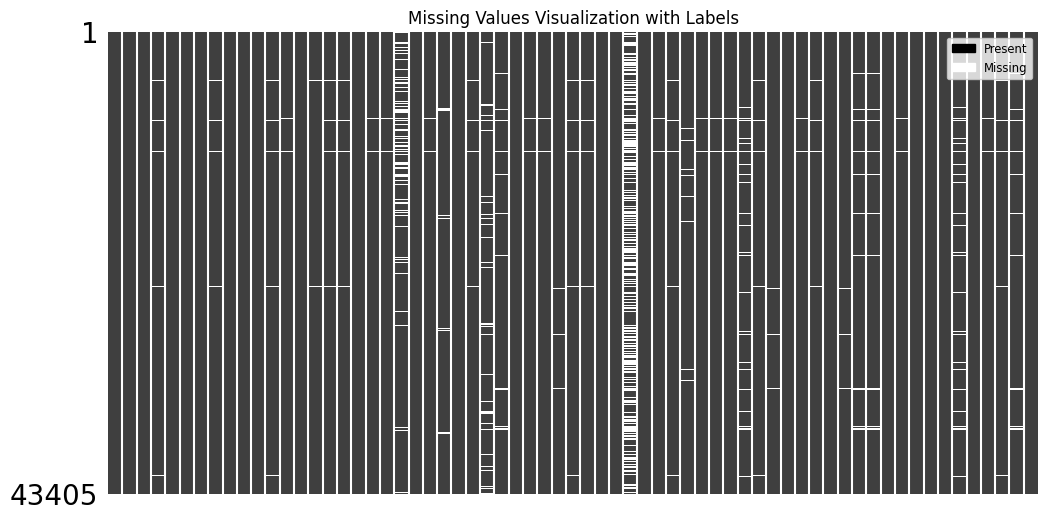

In [8]:
# 3. Check for missing values and visualize

import matplotlib.patches as mpatches
print("\nMissing values:")
print(dataset.isnull().sum())
plt.figure(figsize=(12, 6))
msno.matrix(dataset, figsize=(12, 6), sparkline=False, freq=False, labels=False)
plt.title("Missing Values Visualization with Labels")

# Create legend patches
gray_patch = mpatches.Patch(color='black', label='Present')
white_patch = mpatches.Patch(color='white', label='Missing')

# Add legend to the plot
plt.legend(handles=[gray_patch, white_patch], loc='upper right', fontsize='small')

plt.show()

In [9]:
print(dataset['Attr1'].describe())

count    43397.000000
mean         0.035160
std          2.994109
min       -463.890000
25%          0.003429
50%          0.049660
75%          0.129580
max         94.280000
Name: Attr1, dtype: float64


**What Univariate Analysis Does**

Univariate analysis focuses on examining each feature (variable) in your dataset individually. It provides insights into the distribution, central tendency, and dispersion of each feature without considering its relationship with other features.

Here are the key tasks performed in univariate analysis:

Describing the Distribution:

It helps you understand how the values of a feature are spread out. This is often done using histograms or density plots to visualize the frequency of different values.
Identifying Central Tendency:

It determines the typical or central value of a feature. Common measures of central tendency include the mean, median, and mode.
Measuring Dispersion:

It quantifies the spread or variability of the data around the central tendency. This is often done using measures like standard deviation, range, or interquartile range.
Detecting Outliers:

It helps identify unusual or extreme values that might be errors or have a significant impact on your analysis. Box plots are commonly used to visualize outliers.
Importance in Bankruptcy Prediction

In the context of your bankruptcy prediction project, univariate analysis plays a crucial role in the following ways:

Data Understanding: It helps you gain a deeper understanding of the individual financial ratios and other attributes that might be relevant to bankruptcy prediction. This understanding is essential for making informed decisions about data preprocessing and feature engineering.

Data Quality Checks: It allows you to identify potential data quality issues such as missing values, outliers, or unexpected distributions. Addressing these issues is crucial for building a reliable and accurate prediction model.

Feature Selection: By examining the distribution and characteristics of each feature, you can get an initial idea of its potential relevance for predicting bankruptcy. Features with high variance or strong relationships with the target variable (bankruptcy) might be more informative and worth including in your model.

Model Selection: The insights gained from univariate analysis can help you choose appropriate models for bankruptcy prediction. For example, if a feature has a highly skewed distribution, you might consider transforming it before using it in a linear model.

Communication and Reporting: Univariate analysis provides a clear and concise way to summarize the characteristics of your data. This is helpful for communicating your findings to stakeholders or including them in your project report.



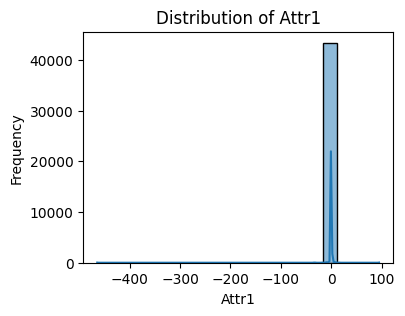

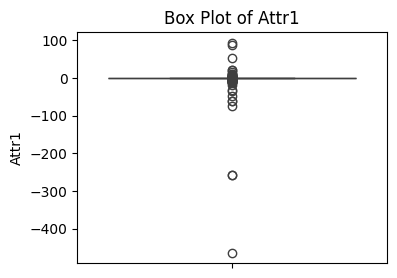

Descriptive statistics for Attr1:
count    43397.000000
mean         0.035160
std          2.994109
min       -463.890000
25%          0.003429
50%          0.049660
75%          0.129580
max         94.280000
Name: Attr1, dtype: float64




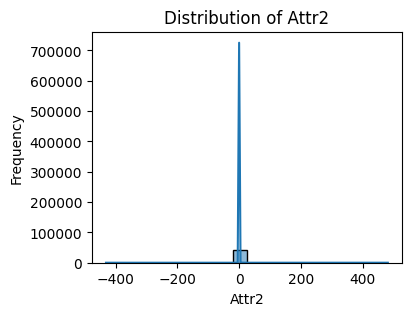

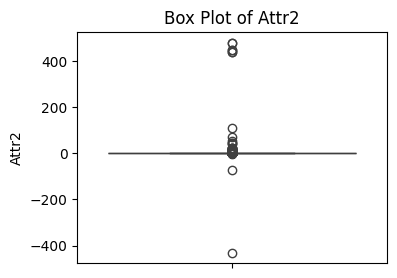

Descriptive statistics for Attr2:
count    43397.000000
mean         0.590212
std          5.842748
min       -430.870000
25%          0.268980
50%          0.471900
75%          0.688320
max        480.960000
Name: Attr2, dtype: float64




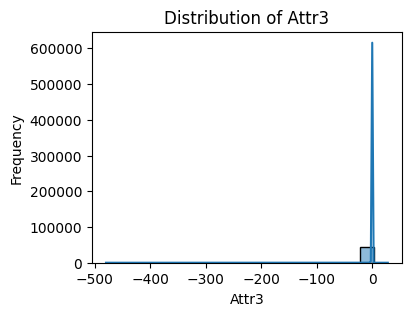

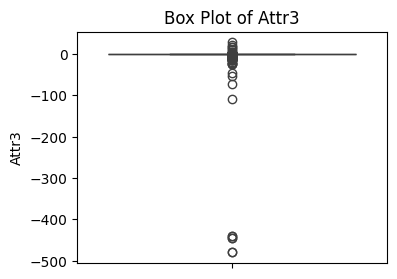

Descriptive statistics for Attr3:
count    43397.000000
mean         0.114431
std          5.439429
min       -479.960000
25%          0.021521
50%          0.196610
75%          0.403390
max         28.336000
Name: Attr3, dtype: float64




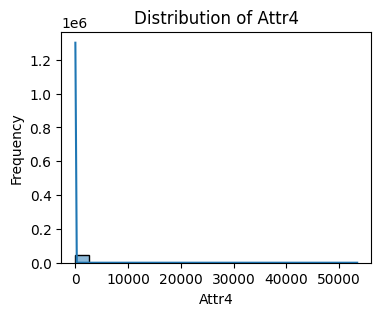

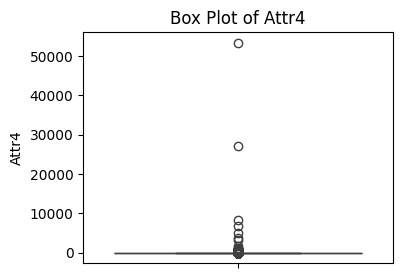

Descriptive statistics for Attr4:
count    43271.000000
mean         6.314702
std        295.434425
min         -0.403110
25%          1.049500
50%          1.569800
75%          2.787450
max      53433.000000
Name: Attr4, dtype: float64




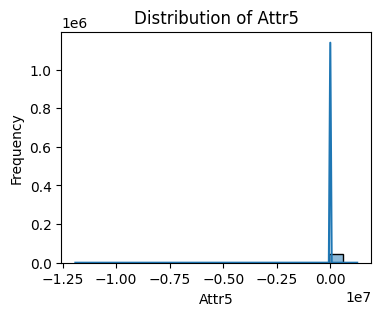

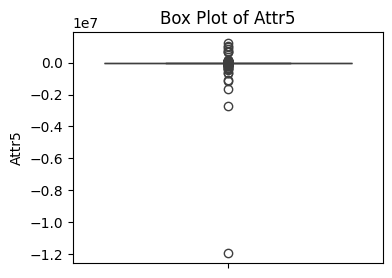

Descriptive statistics for Attr5:
count    4.331600e+04
mean    -3.853466e+02
std      6.124303e+04
min     -1.190300e+07
25%     -4.908000e+01
50%     -1.034500e+00
75%      5.063425e+01
max      1.250100e+06
Name: Attr5, dtype: float64




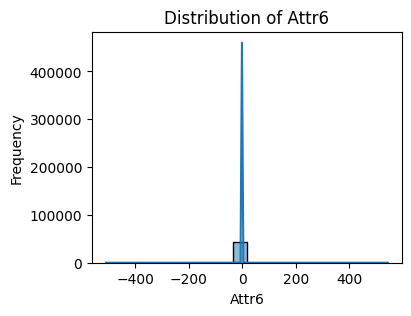

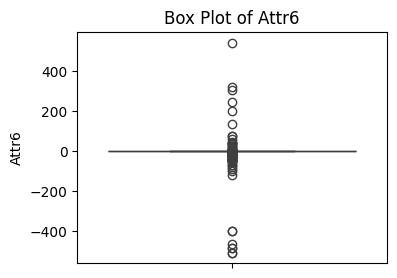

Descriptive statistics for Attr6:
count    43397.000000
mean        -0.056107
std          7.201326
min       -508.410000
25%          0.000000
50%          0.000000
75%          0.089446
max        543.250000
Name: Attr6, dtype: float64




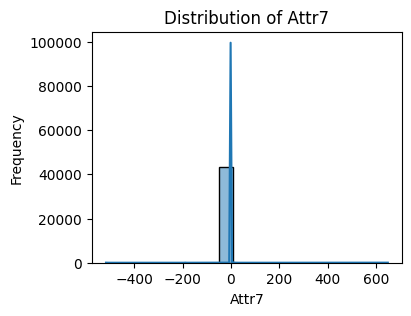

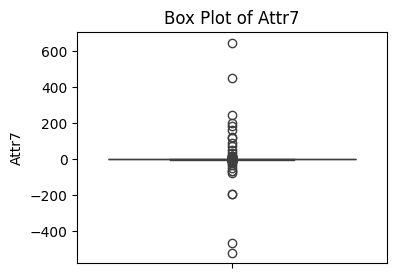

Descriptive statistics for Attr7:
count    43397.000000
mean         0.093478
std          5.713075
min       -517.480000
25%          0.005776
50%          0.059634
75%          0.150880
max        649.230000
Name: Attr7, dtype: float64




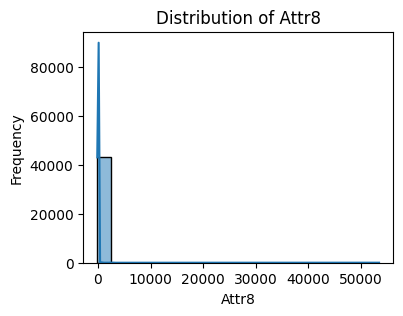

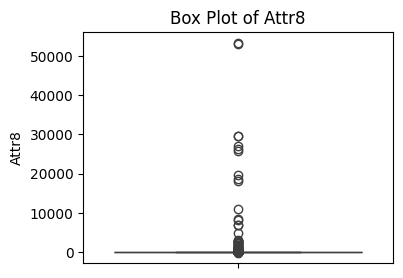

Descriptive statistics for Attr8:
count    43311.000000
mean        12.640779
std        505.894281
min       -141.410000
25%          0.430275
50%          1.070400
75%          2.615700
max      53432.000000
Name: Attr8, dtype: float64




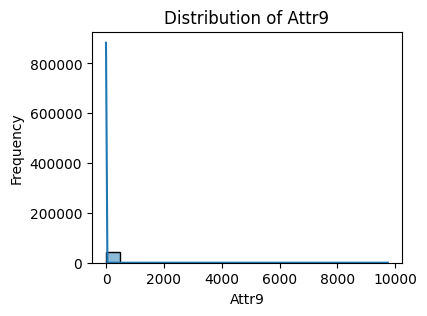

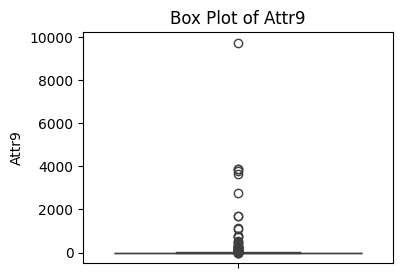

Descriptive statistics for Attr9:
count    43396.000000
mean         2.652166
std         62.932732
min         -3.496000
25%          1.018500
50%          1.195350
75%          2.062500
max       9742.300000
Name: Attr9, dtype: float64




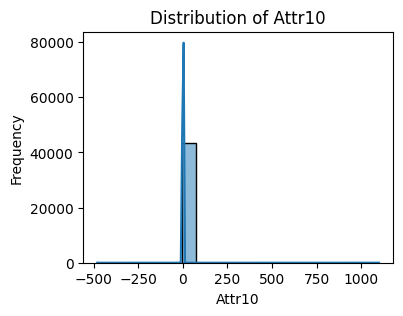

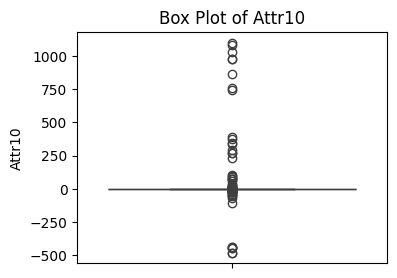

Descriptive statistics for Attr10:
count    43397.000000
mean         0.626868
std         14.670597
min       -479.910000
25%          0.295470
50%          0.505970
75%          0.709100
max       1099.500000
Name: Attr10, dtype: float64




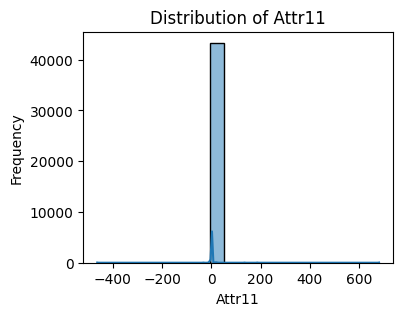

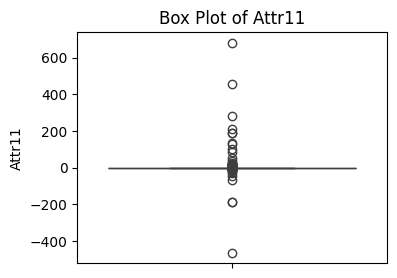

Descriptive statistics for Attr11:
count    43361.000000
mean         0.131075
std          5.306782
min       -463.890000
25%          0.015409
50%          0.075306
75%          0.166770
max        681.540000
Name: Attr11, dtype: float64




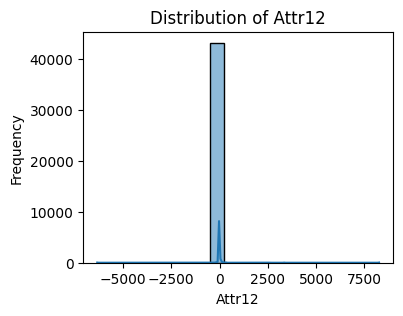

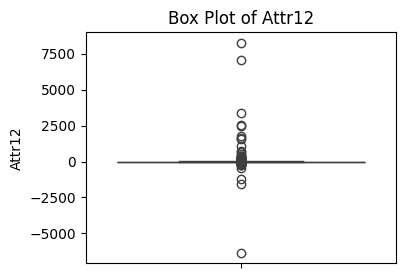

Descriptive statistics for Attr12:
count    43271.000000
mean         1.132430
std         67.590296
min      -6331.800000
25%          0.015072
50%          0.172390
75%          0.586905
max       8259.400000
Name: Attr12, dtype: float64




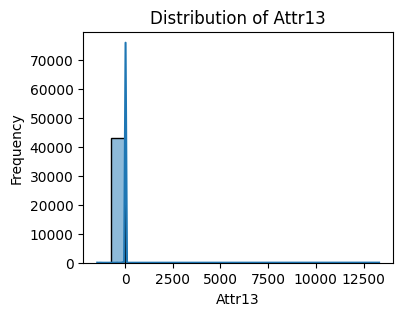

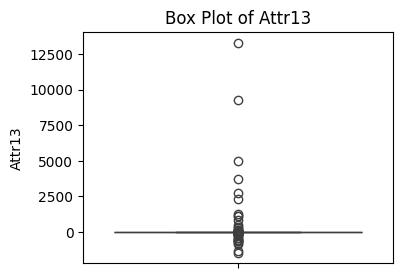

Descriptive statistics for Attr13:
count    43278.000000
mean         0.809544
std         86.944053
min      -1460.600000
25%          0.023881
50%          0.068488
75%          0.134858
max      13315.000000
Name: Attr13, dtype: float64




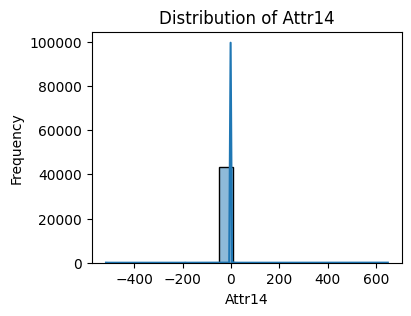

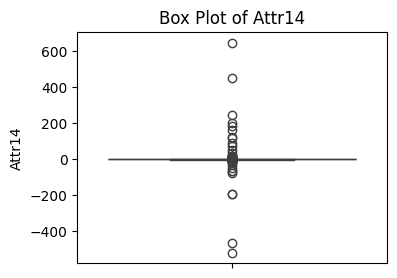

Descriptive statistics for Attr14:
count    43397.000000
mean         0.093489
std          5.713075
min       -517.480000
25%          0.005783
50%          0.059653
75%          0.150880
max        649.230000
Name: Attr14, dtype: float64




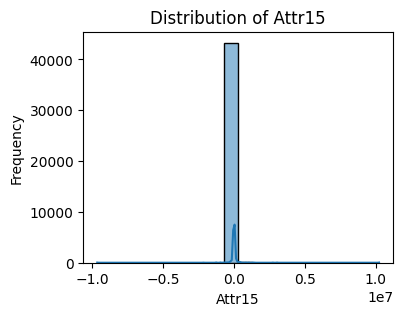

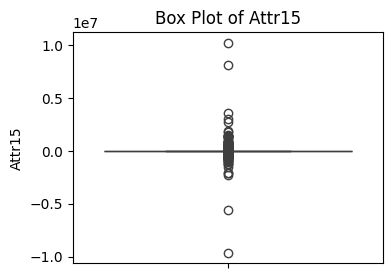

Descriptive statistics for Attr15:
count    4.336900e+04
mean     1.991890e+03
std      9.643193e+04
min     -9.632400e+06
25%      2.225800e+02
50%      8.462600e+02
75%      2.226900e+03
max      1.023600e+07
Name: Attr15, dtype: float64




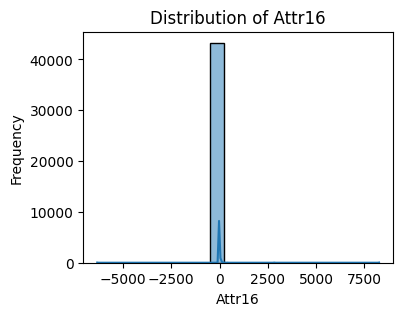

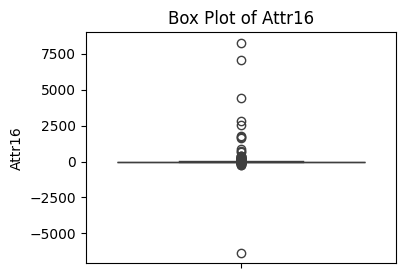

Descriptive statistics for Attr16:
count    43310.000000
mean         1.411167
std         68.519998
min      -6331.800000
25%          0.073476
50%          0.245845
75%          0.664890
max       8259.400000
Name: Attr16, dtype: float64




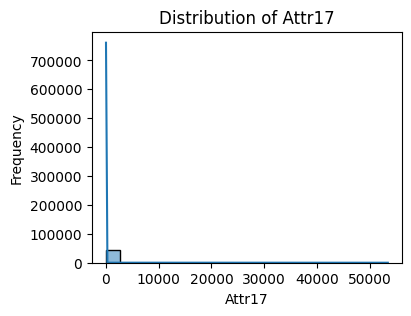

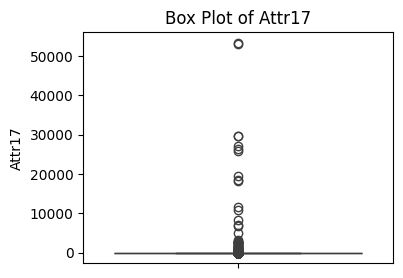

Descriptive statistics for Attr17:
count    43311.000000
mean        13.802535
std        507.322101
min         -0.412920
25%          1.451650
50%          2.116400
75%          3.701350
max      53433.000000
Name: Attr17, dtype: float64




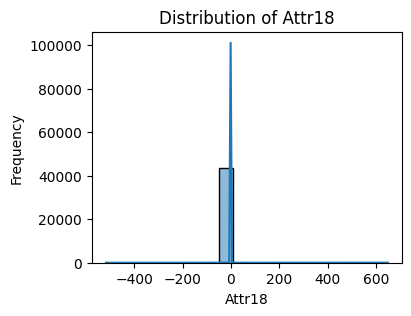

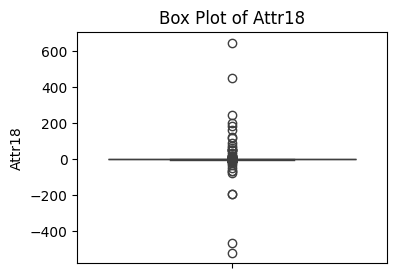

Descriptive statistics for Attr18:
count    43397.000000
mean         0.098565
std          5.737645
min       -517.480000
25%          0.005783
50%          0.059653
75%          0.150910
max        649.230000
Name: Attr18, dtype: float64




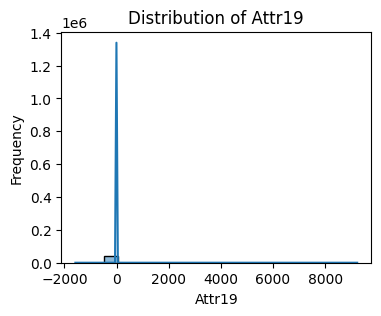

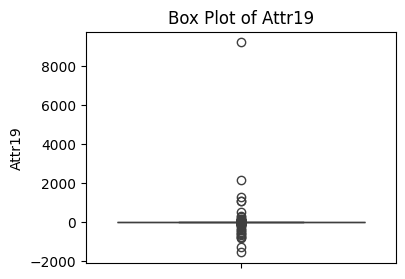

Descriptive statistics for Attr19:
count    43277.000000
mean         0.156277
std         48.692154
min      -1578.700000
25%          0.003870
50%          0.035874
75%          0.090932
max       9230.500000
Name: Attr19, dtype: float64




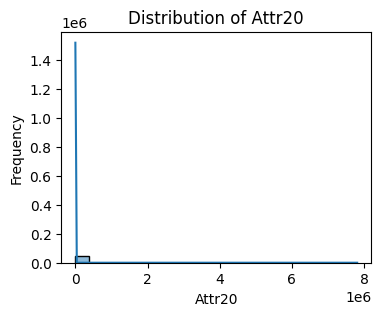

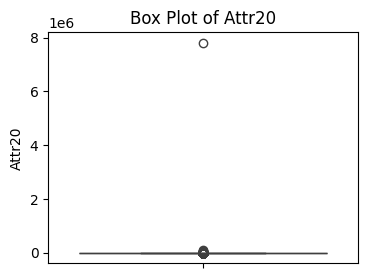

Descriptive statistics for Attr20:
count    4.327800e+04
mean     2.430209e+02
std      3.754517e+04
min     -2.934000e+01
25%      1.541325e+01
50%      3.514950e+01
75%      6.372275e+01
max      7.809200e+06
Name: Attr20, dtype: float64




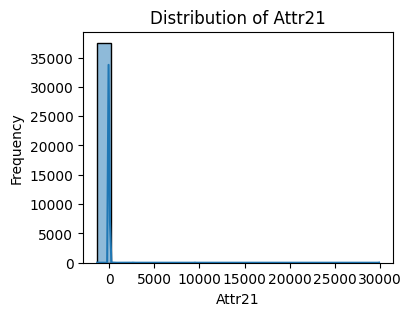

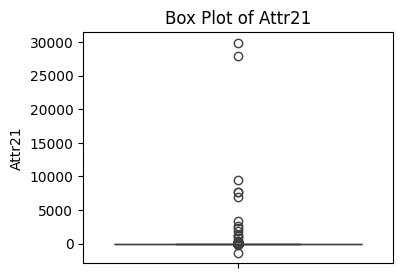

Descriptive statistics for Attr21:
count    37551.000000
mean         3.884997
std        228.668931
min      -1325.000000
25%          0.908225
50%          1.045200
75%          1.203700
max      29907.000000
Name: Attr21, dtype: float64




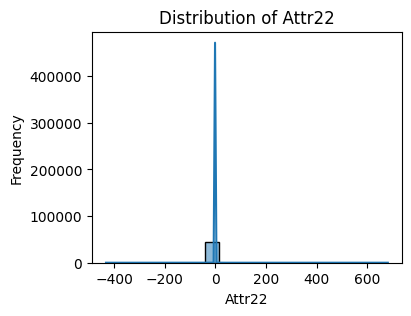

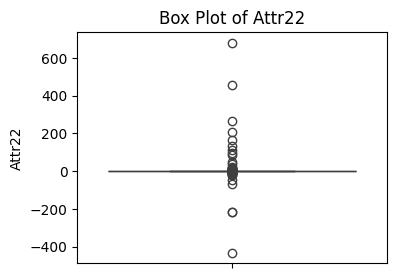

Descriptive statistics for Attr22:
count    43397.000000
mean         0.113923
std          5.155778
min       -431.590000
25%          0.000000
50%          0.062262
75%          0.149950
max        681.540000
Name: Attr22, dtype: float64




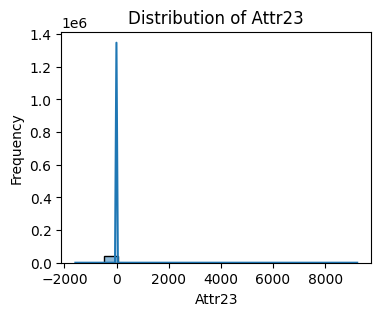

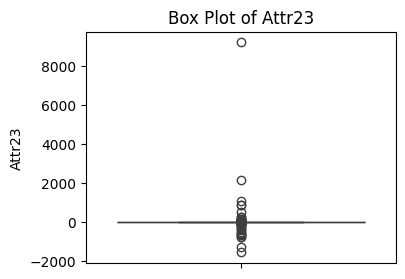

Descriptive statistics for Attr23:
count    43278.000000
mean         0.138582
std         48.334974
min      -1578.700000
25%          0.002269
50%          0.029916
75%          0.078038
max       9230.500000
Name: Attr23, dtype: float64




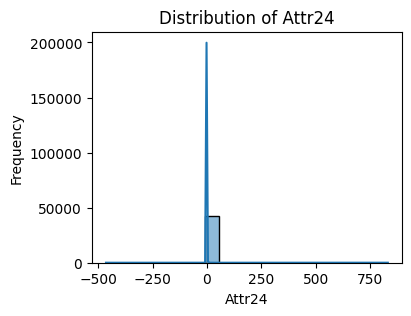

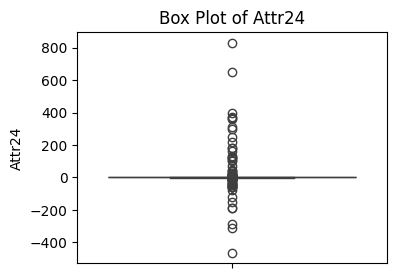

Descriptive statistics for Attr24:
count    42483.000000
mean         0.270012
std          7.988151
min       -463.890000
25%          0.021336
50%          0.155100
75%          0.355590
max        831.660000
Name: Attr24, dtype: float64




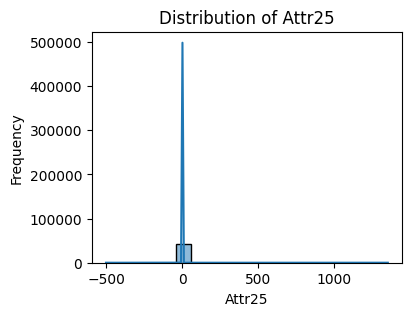

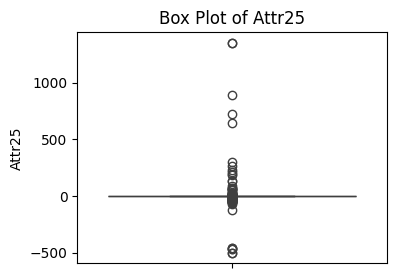

Descriptive statistics for Attr25:
count    43397.000000
mean         0.392844
std         12.891440
min       -500.930000
25%          0.150100
50%          0.384520
75%          0.610730
max       1353.300000
Name: Attr25, dtype: float64




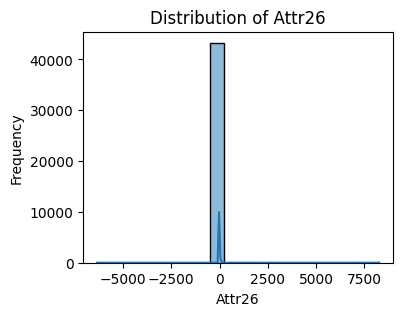

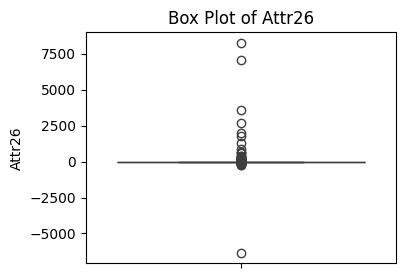

Descriptive statistics for Attr26:
count    43310.000000
mean         1.263864
std         66.224124
min      -6331.800000
25%          0.066743
50%          0.221705
75%          0.598660
max       8262.300000
Name: Attr26, dtype: float64




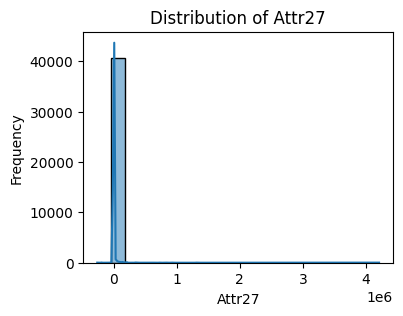

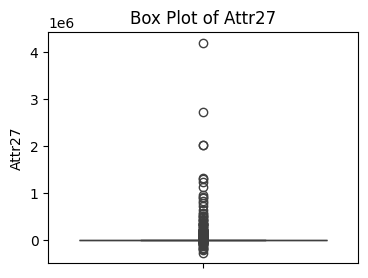

Descriptive statistics for Attr27:
count    4.064100e+04
mean     1.107896e+03
std      3.501237e+04
min     -2.590100e+05
25%      4.504800e-02
50%      1.084100e+00
75%      5.139300e+00
max      4.208800e+06
Name: Attr27, dtype: float64




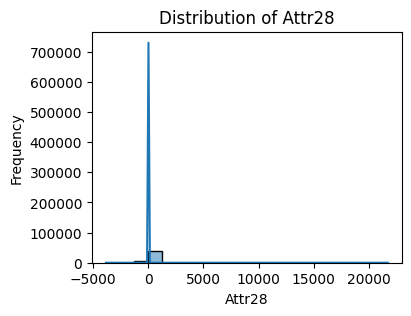

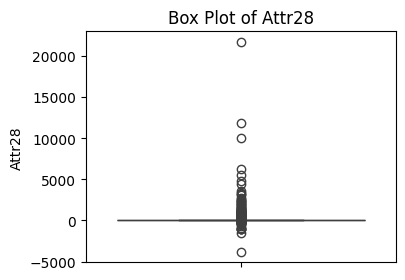

Descriptive statistics for Attr28:
count    42593.000000
mean         6.003208
std        153.468628
min      -3829.900000
25%          0.038214
50%          0.465390
75%          1.496600
max      21701.000000
Name: Attr28, dtype: float64




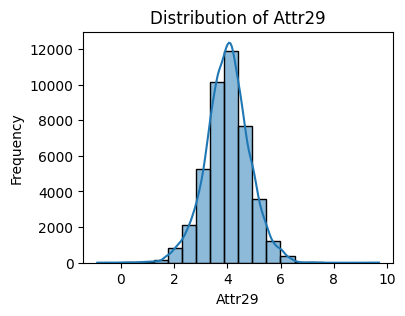

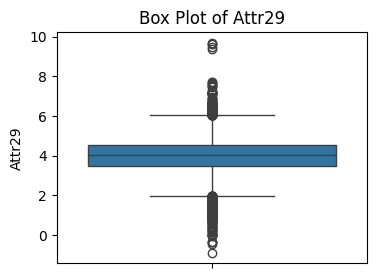

Descriptive statistics for Attr29:
count    43397.000000
mean         4.005020
std          0.826857
min         -0.886060
25%          3.495100
50%          4.014000
75%          4.520200
max          9.698300
Name: Attr29, dtype: float64




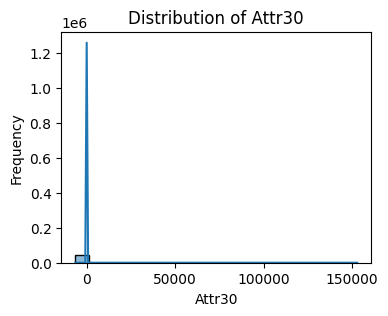

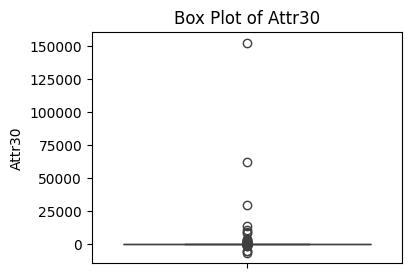

Descriptive statistics for Attr30:
count     43278.000000
mean          7.370821
std         814.490078
min       -6351.700000
25%           0.082753
50%           0.217500
75%           0.408957
max      152860.000000
Name: Attr30, dtype: float64




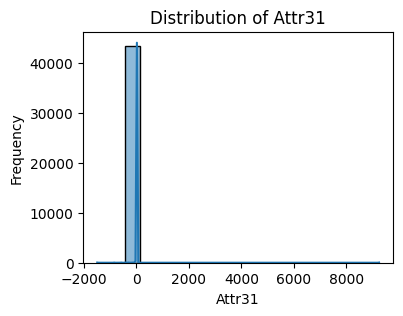

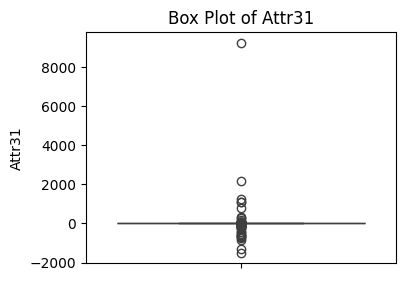

Descriptive statistics for Attr31:
count    43278.000000
mean         0.176847
std         48.748410
min      -1495.600000
25%          0.006961
50%          0.043104
75%          0.101530
max       9244.300000
Name: Attr31, dtype: float64




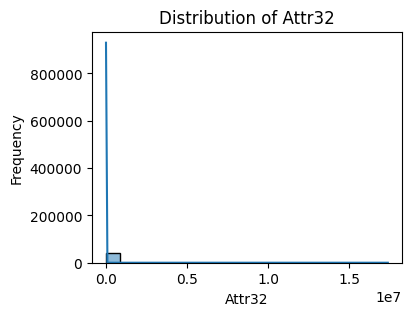

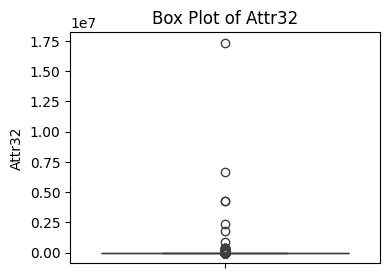

Descriptive statistics for Attr32:
count    4.303700e+04
mean     1.162621e+03
std      9.559356e+04
min     -9.295600e+03
25%      4.639500e+01
50%      7.832500e+01
75%      1.280800e+02
max      1.736400e+07
Name: Attr32, dtype: float64




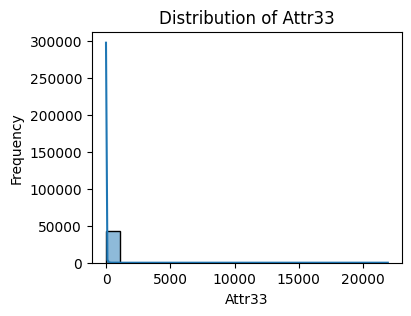

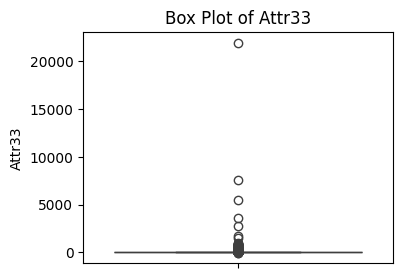

Descriptive statistics for Attr33:
count    43271.000000
mean         8.636016
std        118.991185
min        -19.197000
25%          2.819900
50%          4.625500
75%          7.803100
max      21944.000000
Name: Attr33, dtype: float64




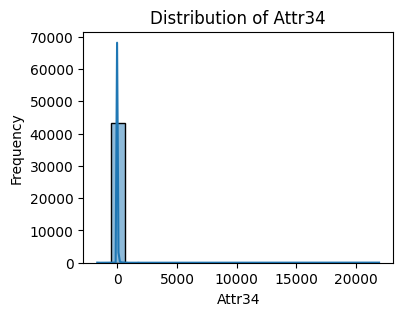

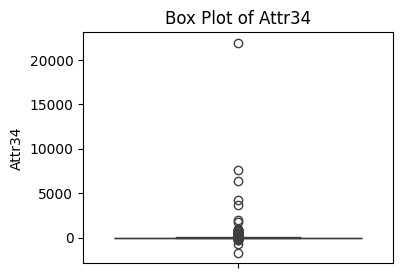

Descriptive statistics for Attr34:
count    43311.000000
mean         5.411439
std        120.975110
min      -1696.000000
25%          0.305725
50%          1.967400
75%          4.551050
max      21944.000000
Name: Attr34, dtype: float64




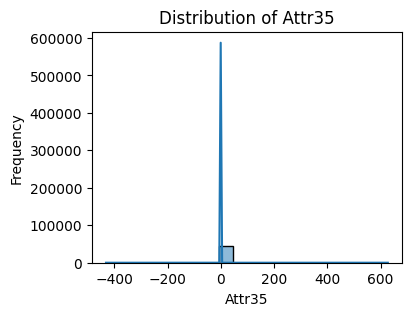

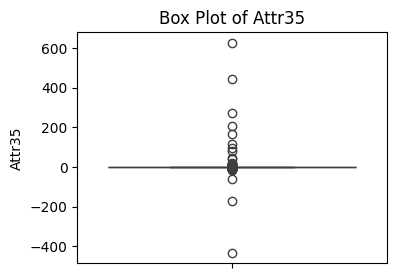

Descriptive statistics for Attr35:
count    43397.000000
mean         0.111908
std          4.783398
min       -431.590000
25%          0.006038
50%          0.060655
75%          0.150070
max        626.920000
Name: Attr35, dtype: float64




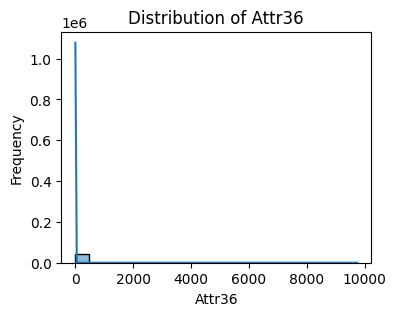

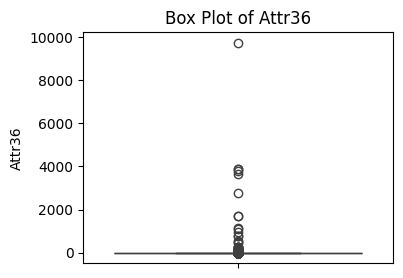

Descriptive statistics for Attr36:
count    43397.000000
mean         2.911241
std         62.984347
min         -0.000857
25%          1.101100
50%          1.643400
75%          2.420900
max       9742.300000
Name: Attr36, dtype: float64




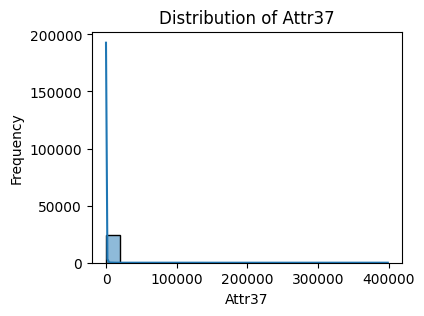

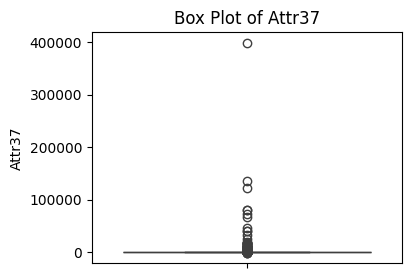

Descriptive statistics for Attr37:
count     24421.000000
mean        105.085363
std        3058.429830
min        -525.520000
25%           1.142300
50%           3.096300
75%          11.414000
max      398920.000000
Name: Attr37, dtype: float64




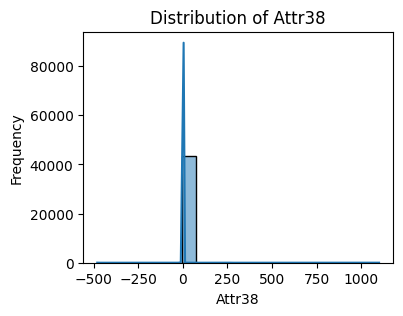

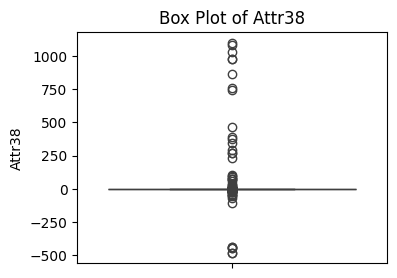

Descriptive statistics for Attr38:
count    43397.000000
mean         0.724357
std         14.749270
min       -479.910000
25%          0.419830
50%          0.612150
75%          0.771830
max       1099.500000
Name: Attr38, dtype: float64




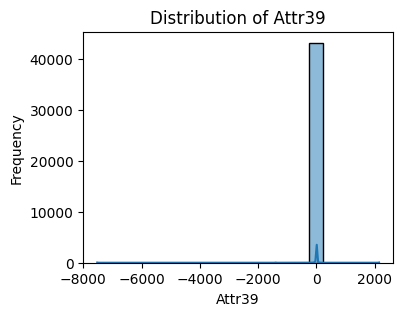

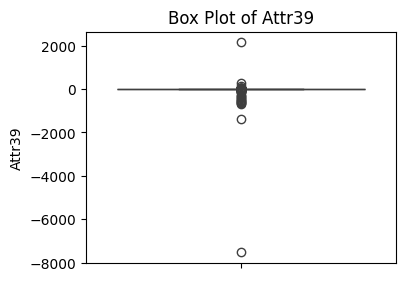

Descriptive statistics for Attr39:
count    43278.000000
mean        -0.289102
std         39.256360
min      -7522.000000
25%          0.004165
50%          0.036874
75%          0.091759
max       2156.500000
Name: Attr39, dtype: float64




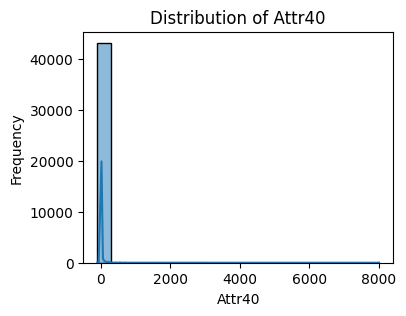

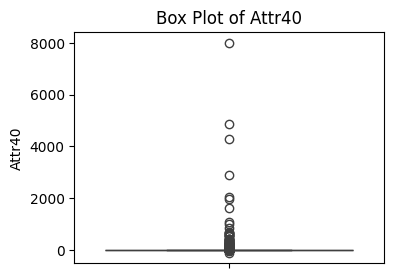

Descriptive statistics for Attr40:
count    43271.000000
mean         2.147411
std         56.029879
min       -101.270000
25%          0.052696
50%          0.176720
75%          0.652260
max       8007.100000
Name: Attr40, dtype: float64




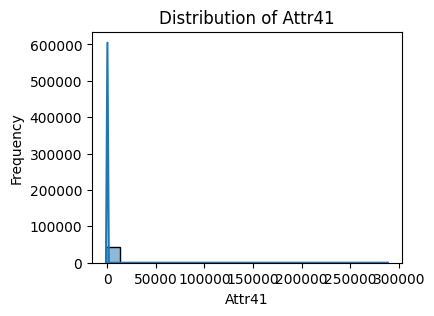

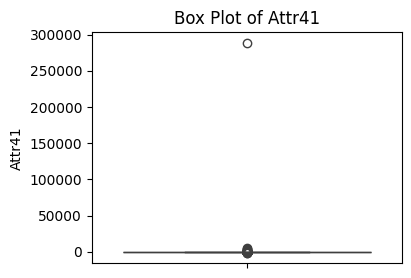

Descriptive statistics for Attr41:
count     42651.000000
mean          7.717806
std        1398.837543
min       -1234.400000
25%           0.026679
50%           0.085515
75%           0.205625
max      288770.000000
Name: Attr41, dtype: float64




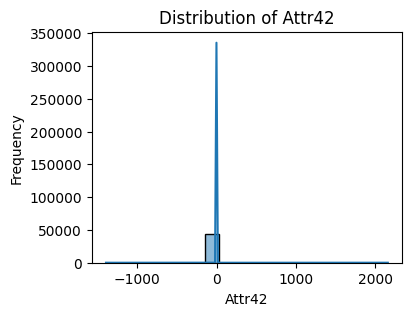

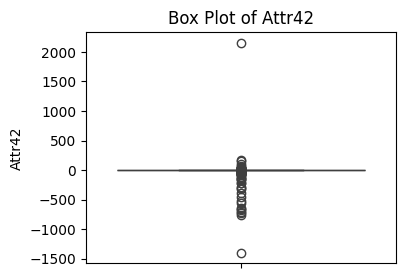

Descriptive statistics for Attr42:
count    43278.000000
mean        -0.142514
std         15.990988
min      -1395.800000
25%          0.000000
50%          0.038015
75%          0.092132
max       2156.800000
Name: Attr42, dtype: float64




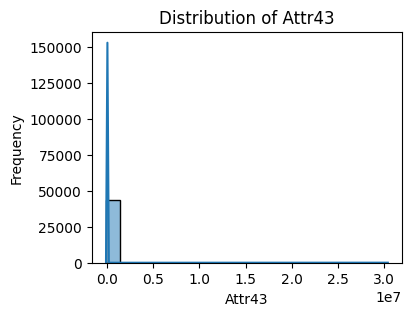

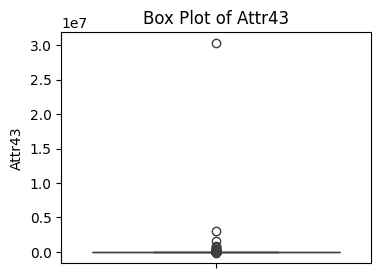

Descriptive statistics for Attr43:
count    4.327800e+04
mean     1.074125e+03
std      1.472188e+05
min     -1.158700e+05
25%      6.660850e+01
50%      9.940150e+01
75%      1.406975e+02
max      3.039300e+07
Name: Attr43, dtype: float64




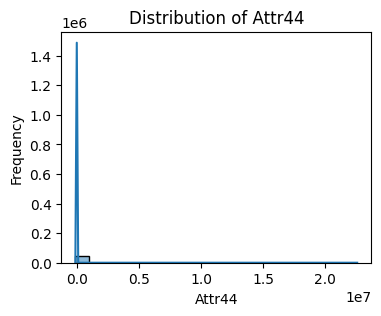

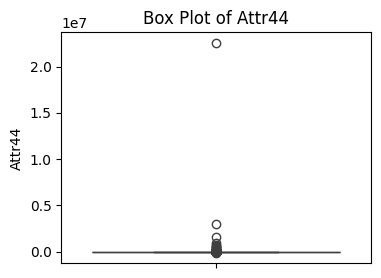

Descriptive statistics for Attr44:
count    4.327800e+04
mean     8.311085e+02
std      1.100510e+05
min     -1.158700e+05
25%      3.487775e+01
50%      5.476750e+01
75%      8.052250e+01
max      2.258400e+07
Name: Attr44, dtype: float64




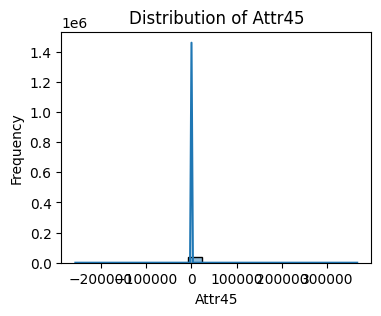

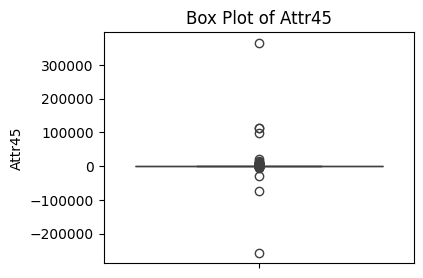

Descriptive statistics for Attr45:
count     41258.000000
mean         14.825016
std        2428.236110
min     -256230.000000
25%           0.019168
50%           0.282825
75%           0.955588
max      366030.000000
Name: Attr45, dtype: float64




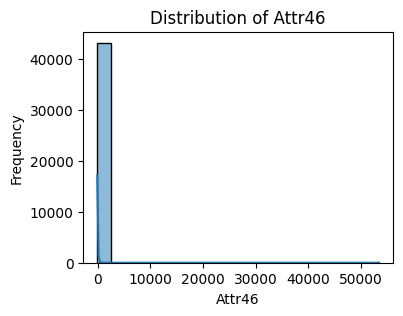

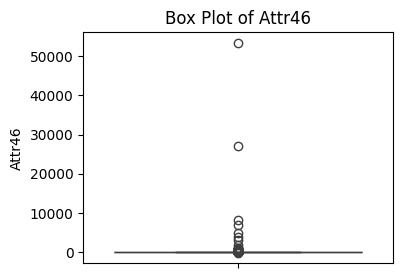

Descriptive statistics for Attr46:
count    43270.000000
mean         5.428857
std        295.356200
min       -101.260000
25%          0.607455
50%          1.026650
75%          1.910775
max      53433.000000
Name: Attr46, dtype: float64




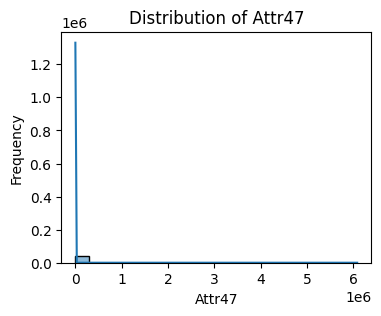

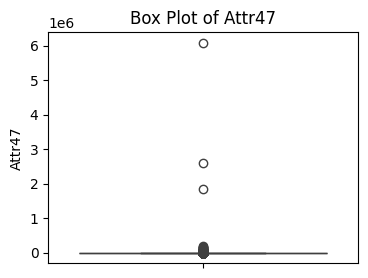

Descriptive statistics for Attr47:
count    4.310800e+04
mean     3.578418e+02
std      3.314634e+04
min     -9.611000e+01
25%      1.622575e+01
50%      3.812950e+01
75%      7.033950e+01
max      6.084200e+06
Name: Attr47, dtype: float64




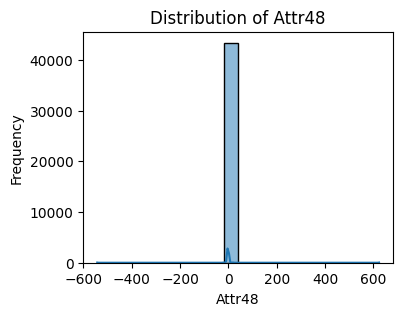

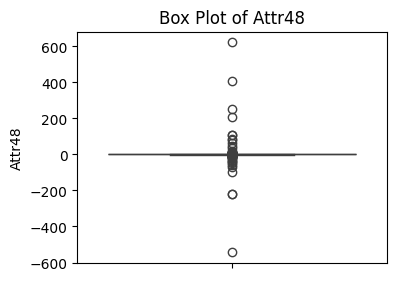

Descriptive statistics for Attr48:
count    43396.000000
mean         0.028584
std          5.097322
min       -542.560000
25%         -0.038183
50%          0.018430
75%          0.107332
max        623.850000
Name: Attr48, dtype: float64




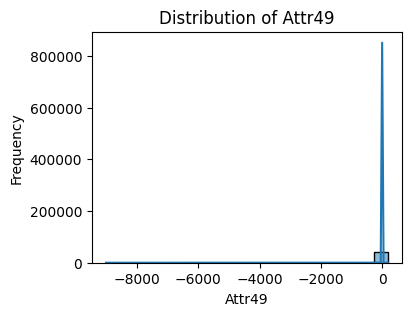

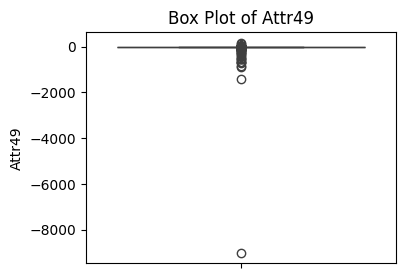

Descriptive statistics for Attr49:
count    43278.000000
mean        -0.482584
std         45.152174
min      -9001.000000
25%         -0.026674
50%          0.010970
75%          0.062246
max        178.890000
Name: Attr49, dtype: float64




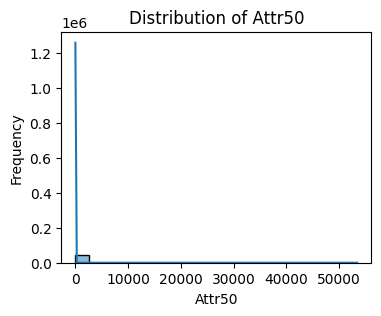

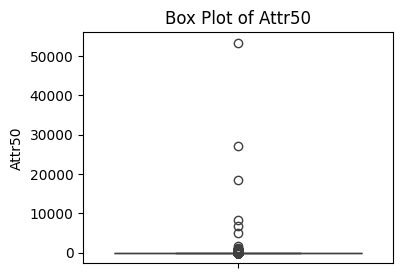

Descriptive statistics for Attr50:
count    43311.000000
mean         5.835373
std        307.382687
min         -0.045239
25%          0.774935
50%          1.222200
75%          2.208600
max      53433.000000
Name: Attr50, dtype: float64




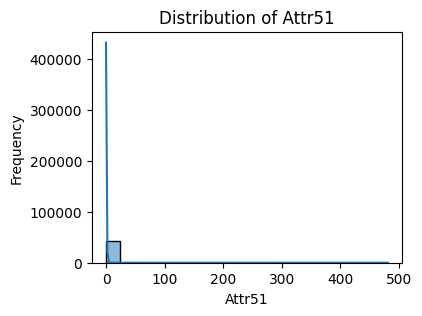

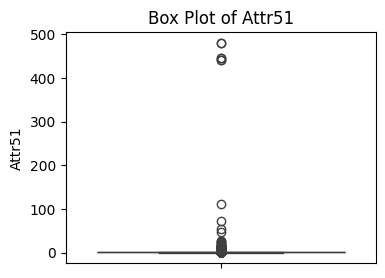

Descriptive statistics for Attr51:
count    43397.000000
mean         0.483521
std          5.438357
min         -0.186610
25%          0.190060
50%          0.341010
75%          0.534680
max        480.960000
Name: Attr51, dtype: float64




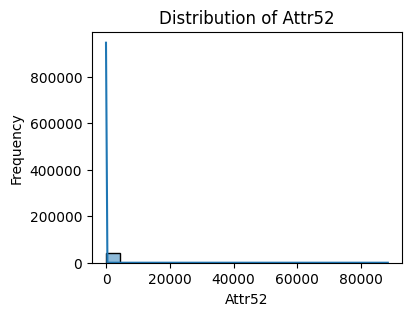

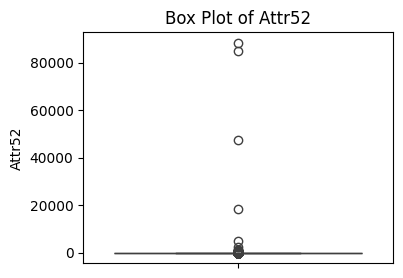

Descriptive statistics for Attr52:
count    43104.000000
mean         6.478459
std        639.887467
min        -25.467000
25%          0.126937
50%          0.214150
75%          0.350213
max      88433.000000
Name: Attr52, dtype: float64




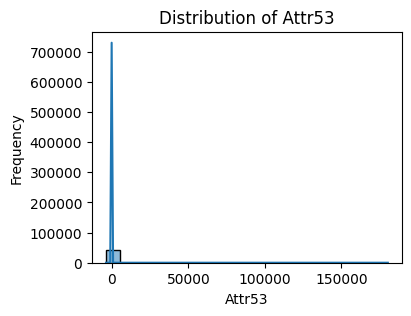

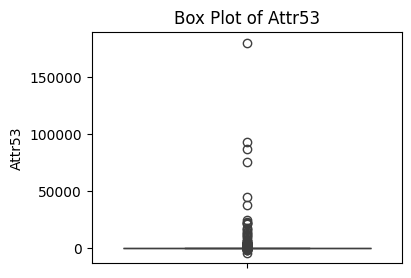

Descriptive statistics for Attr53:
count     42593.000000
mean         23.772623
std        1213.797976
min       -3828.900000
25%           0.686780
50%           1.205300
75%           2.221400
max      180440.000000
Name: Attr53, dtype: float64




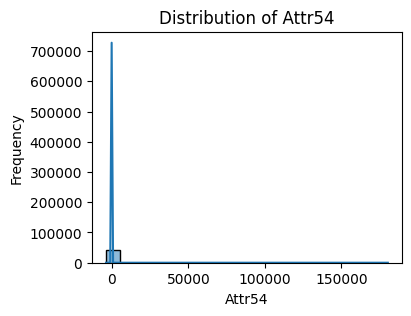

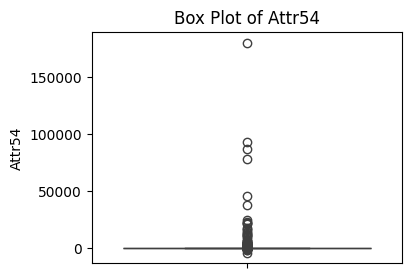

Descriptive statistics for Attr54:
count     42593.000000
mean         24.654700
std        1220.884065
min       -3828.900000
25%           0.956330
50%           1.376700
75%           2.369700
max      180440.000000
Name: Attr54, dtype: float64




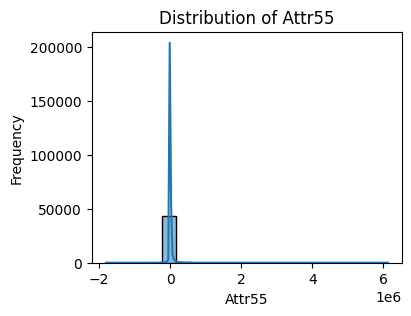

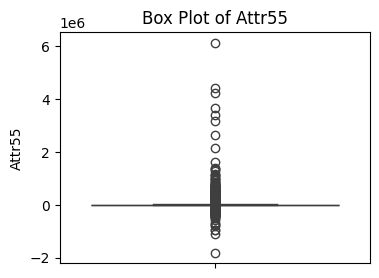

Descriptive statistics for Attr55:
count    4.340400e+04
mean     7.672188e+03
std      7.005310e+04
min     -1.805200e+06
25%      2.755425e+01
50%      1.088350e+03
75%      4.993325e+03
max      6.123700e+06
Name: Attr55, dtype: float64




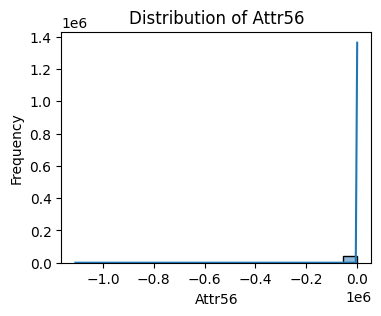

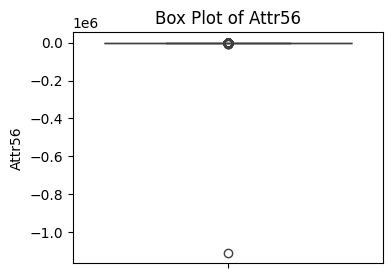

Descriptive statistics for Attr56:
count    4.327800e+04
mean    -2.621959e+01
std      5.327862e+03
min     -1.108300e+06
25%      9.348500e-03
50%      5.294300e-02
75%      1.290975e-01
max      2.931500e+02
Name: Attr56, dtype: float64




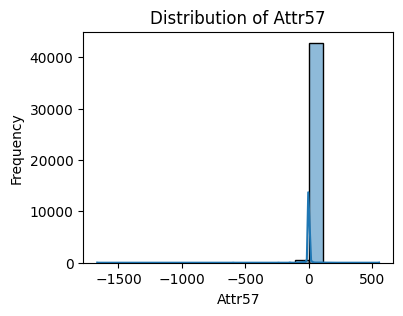

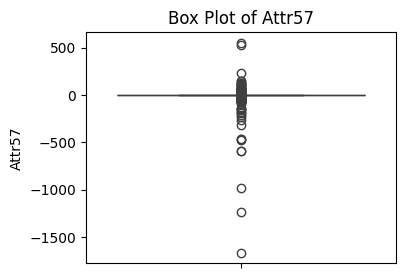

Descriptive statistics for Attr57:
count    43398.000000
mean        -0.010510
std         13.674072
min      -1667.300000
25%          0.014649
50%          0.119670
75%          0.284605
max        552.640000
Name: Attr57, dtype: float64




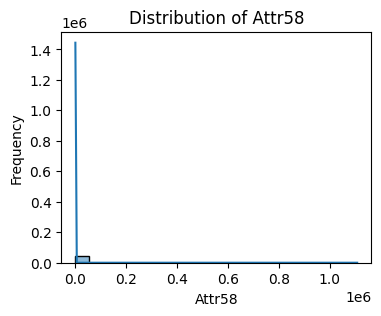

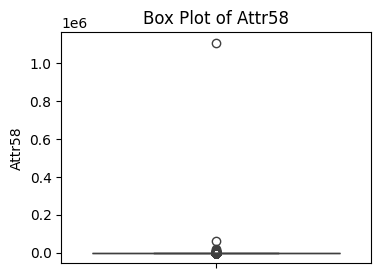

Descriptive statistics for Attr58:
count    4.332100e+04
mean     3.002644e+01
std      5.334454e+03
min     -1.986900e+02
25%      8.753200e-01
50%      9.509600e-01
75%      9.926400e-01
max      1.108300e+06
Name: Attr58, dtype: float64




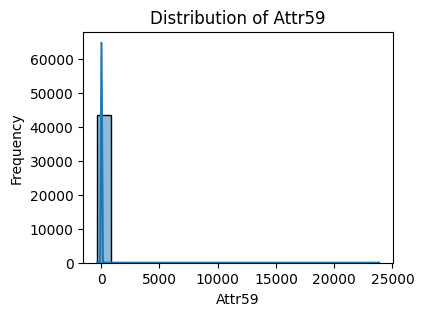

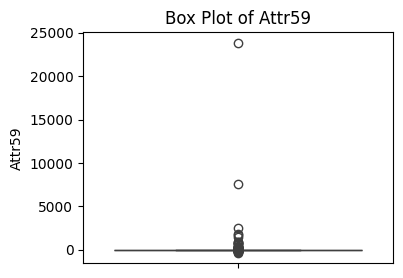

Descriptive statistics for Attr59:
count    43398.000000
mean         1.333288
std        122.104445
min       -327.970000
25%          0.000000
50%          0.006366
75%          0.236052
max      23853.000000
Name: Attr59, dtype: float64




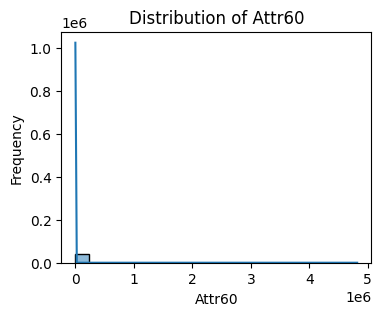

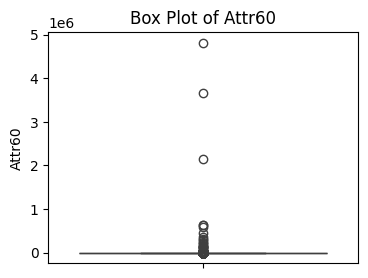

Descriptive statistics for Attr60:
count    4.125300e+04
mean     4.480858e+02
std      3.234560e+04
min     -1.244000e+01
25%      5.545500e+00
50%      9.791700e+00
75%      2.018100e+01
max      4.818700e+06
Name: Attr60, dtype: float64




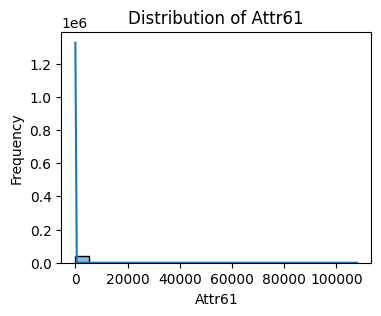

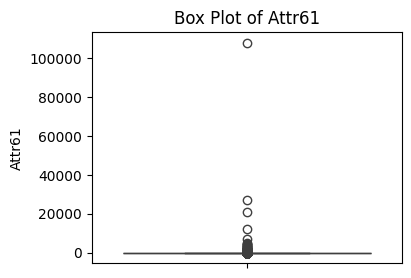

Descriptive statistics for Attr61:
count     43303.000000
mean         17.033202
std         553.049406
min         -12.656000
25%           4.510150
50%           6.636300
75%          10.394500
max      108000.000000
Name: Attr61, dtype: float64




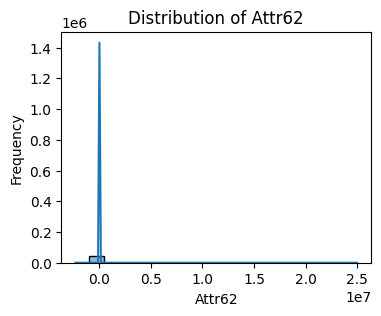

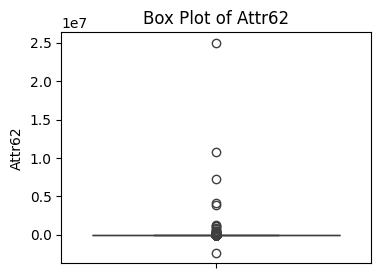

Descriptive statistics for Attr62:
count    4.327800e+04
mean     1.502328e+03
std      1.392667e+05
min     -2.336500e+06
25%      4.214400e+01
50%      7.132600e+01
75%      1.172200e+02
max      2.501600e+07
Name: Attr62, dtype: float64




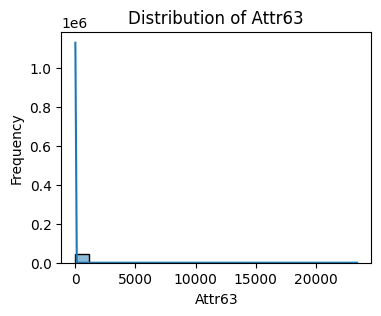

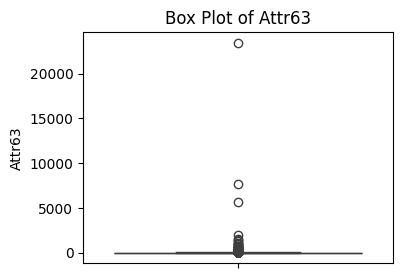

Descriptive statistics for Attr63:
count    43271.000000
mean         9.343074
std        124.177354
min         -1.543200
25%          3.097650
50%          5.087600
75%          8.598850
max      23454.000000
Name: Attr63, dtype: float64




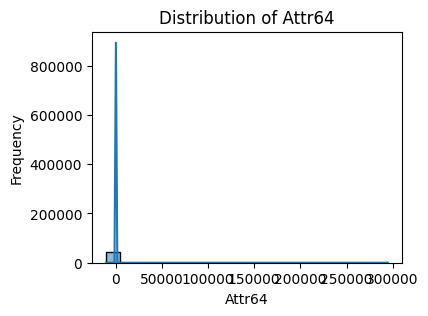

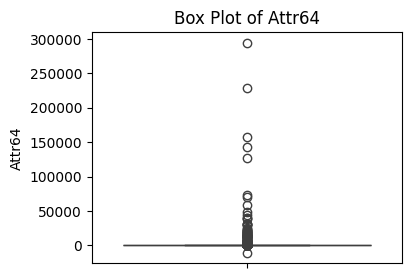

Descriptive statistics for Attr64:
count     42593.000000
mean         72.788592
std        2369.339482
min      -10677.000000
25%           2.176800
50%           4.282500
75%           9.776200
max      294770.000000
Name: Attr64, dtype: float64




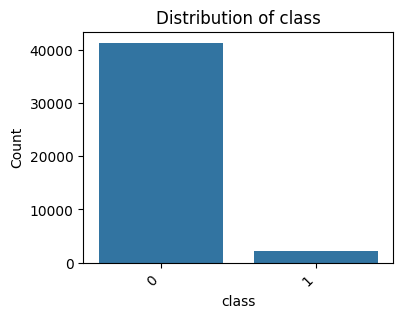

In [10]:
import pandas as pd  # Importing pandas for data manipulation
import matplotlib.pyplot as plt  # Importing matplotlib for creating plots
import seaborn as sns  # Importing seaborn for enhanced visualizations

# Assuming your dataset is loaded into a pandas DataFrame called 'dataset'

# Selecting numerical features for univariate analysis
# This line selects all columns with numerical data types (int, float)
numerical_features = dataset.select_dtypes(include=['number']).columns

# Looping through each numerical feature to create visualizations
for feature in numerical_features:

    # Creating a histogram to visualize the distribution of the feature
    plt.figure(figsize=(4, 3))  # Setting the figure size for the plot

    # Using seaborn's histplot to create the histogram
    # bins: Number of bins to divide the data into
    # kde: Whether to show a kernel density estimate curve
    sns.histplot(dataset[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')  # Setting the title of the plot
    plt.xlabel(feature)  # Setting the x-axis label
    plt.ylabel('Frequency')  # Setting the y-axis label
    plt.show()  # Displaying the plot

    # Creating a box plot to visualize quartiles and potential outliers
    plt.figure(figsize=(4, 3))  # Setting the figure size
    sns.boxplot(y=dataset[feature])  # Using seaborn's boxplot
    plt.title(f'Box Plot of {feature}')  # Setting the title
    plt.ylabel(feature)  # Setting the y-axis label
    plt.show()  # Displaying the plot

    # Optional: Printing descriptive statistics for the feature
    print(f"Descriptive statistics for {feature}:")
    print(dataset[feature].describe())  # Using pandas' describe() function
    print("\n")  # Adding a newline for better readability

# For categorical features, we'll use bar plots or count plots
# Selecting categorical features (object data type)
categorical_features = dataset.select_dtypes(include=['object']).columns

# Looping through each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(4, 3))  # Setting figure size
    # Using seaborn's countplot to show the frequency of each category
    sns.countplot(x=dataset[feature])
    plt.title(f'Distribution of {feature}')  # Setting the title
    plt.xlabel(feature)  # Setting the x-axis label
    plt.ylabel('Count')  # Setting the y-axis label
    # Rotating x-axis labels for better readability if needed
    plt.xticks(rotation=45, ha='right')
    plt.show()  # Displaying the plot

**Importance of Multivariate Analysis in Your Project**

Multivariate analysis is crucial in your bankruptcy prediction project for the following reasons:

Identifying Feature Interactions: It helps you explore the relationships and interactions between multiple features simultaneously. This is important because bankruptcy is often influenced by a combination of factors, and understanding these interactions can improve your model's accuracy.

Feature Selection: By analyzing the correlations and relationships between features, you can identify the most relevant and informative features for predicting bankruptcy. This can help you reduce the dimensionality of your data and avoid overfitting your model.

Model Selection: The insights gained from multivariate analysis can guide your choice of model. For example, if you find strong interactions between features, you might consider using a model that can capture these interactions, such as a random forest or neural network.

Data Visualization: Multivariate analysis techniques like heatmaps and scatter plots provide visual representations of the relationships between features. This can help you communicate your findings effectively to stakeholders and gain a deeper understanding of your data.

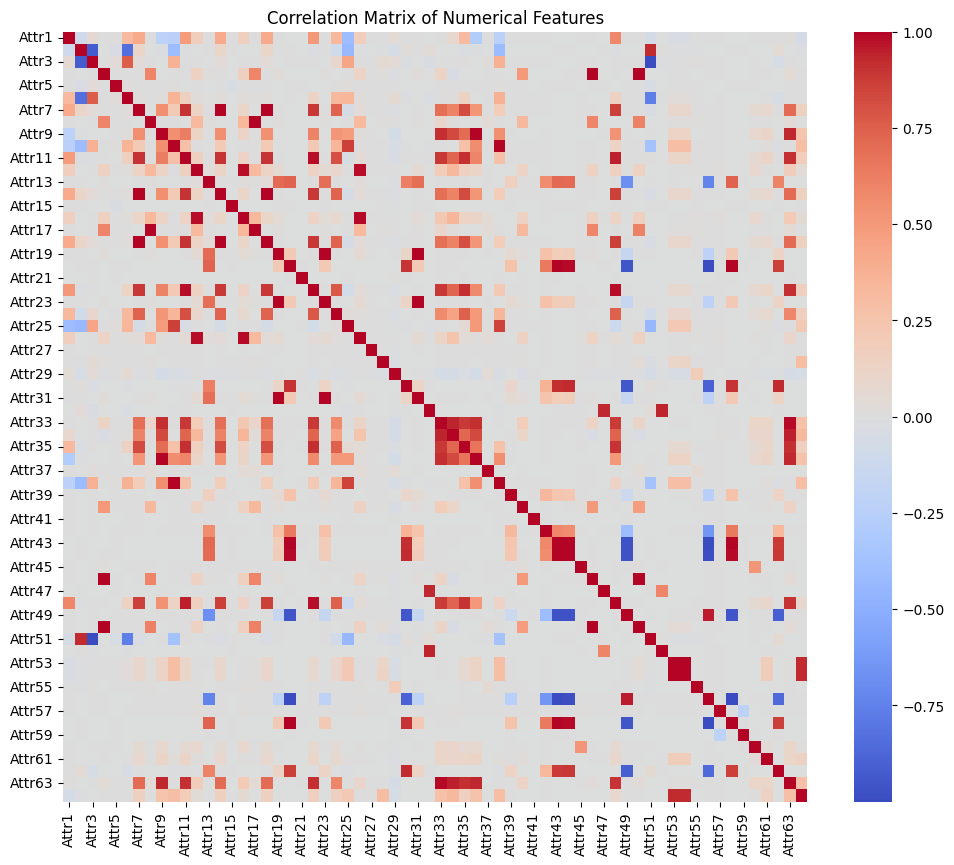

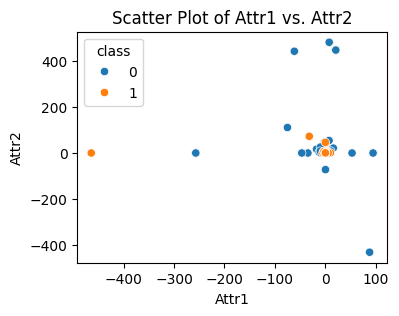

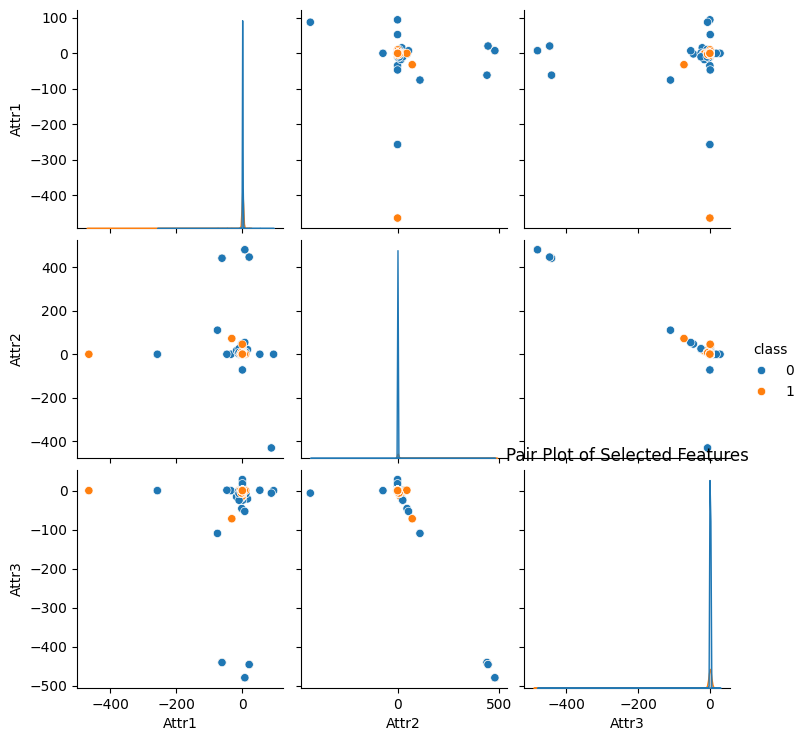

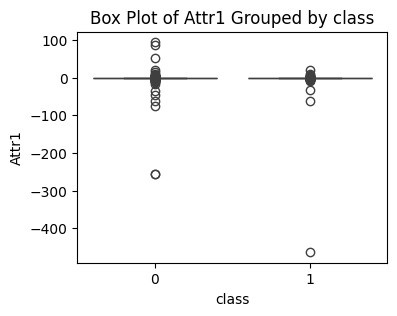

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a pandas DataFrame called 'dataset'

# 1. Correlation Matrix and Heatmap
# Calculate the correlation matrix for numerical features
numerical_features = dataset.select_dtypes(include=['number']).columns
correlation_matrix = dataset[numerical_features].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 2. Scatter Plots for Feature Relationships
# Select two features for a scatter plot (example)
feature1 = 'Attr1'  # Replace with your feature name
feature2 = 'Attr2'  # Replace with your feature name

plt.figure(figsize=(4, 3))
sns.scatterplot(data=dataset, x=feature1, y=feature2, hue='class')  # 'class' is your target variable
plt.title(f'Scatter Plot of {feature1} vs. {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

# 3. Pair Plot for Multiple Feature Relationships
# Create a pair plot for selected features (example)
selected_features = ['Attr1', 'Attr2', 'Attr3', 'class']  # Replace with your feature names
sns.pairplot(dataset[selected_features], hue='class')  # 'class' is your target variable
plt.title('Pair Plot of Selected Features')
plt.show()

# 4. Grouped Box Plots for Categorical vs. Numerical Features
# Create grouped box plots (example)
categorical_feature = 'class'  # Replace with your categorical feature name
numerical_feature = 'Attr1'  # Replace with your numerical feature name

plt.figure(figsize=(4, 3))
sns.boxplot(x=categorical_feature, y=numerical_feature, data=dataset)
plt.title(f'Box Plot of {numerical_feature} Grouped by {categorical_feature}')
plt.xlabel(categorical_feature)
plt.ylabel(numerical_feature)
plt.show()

**DATA PROCESSING**

In [12]:
#  Handling missing values using KNN
from sklearn.impute import KNNImputer

# Create a KNN imputer object (e.g., with k=5 neighbors)
imputer = KNNImputer(n_neighbors=5)

# Fit the imputer to your numerical features and transform the dataset
dataset[numerical_features] = imputer.fit_transform(dataset[numerical_features])

In [13]:
dataset.isnull().sum()

,0
Attr1,0
Attr2,0
Attr3,0
Attr4,0
Attr5,0
...,...
Attr61,0
Attr62,0
Attr63,0
Attr64,0


**Benefits of Feature Scaling**

Improved model performance: By ensuring features contribute equally, feature scaling can improve the accuracy and efficiency of machine learning models.
Faster convergence: For algorithms like gradient descent, feature scaling can help the algorithm converge faster to the optimal solution.
Enhanced interpretability: Feature scaling can make the model's coefficients or feature importance scores more interpretable.

In [14]:
# Feature Scaling
# Feature scaling is a technique used to transform numerical features in a dataset to a specific
# scale or distribution. This is done to ensure that all features contribute equally to the learning process of machine learning algorithms and to improve the performance and interpretability of models.

from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to your numerical features
scaler.fit(dataset[numerical_features])

# Transform the dataset to scale the features
dataset[numerical_features] = scaler.transform(dataset[numerical_features])

In [15]:
# The code performs both outlier detection and handling.
# It first detects outliers using the IQR method and then handles them using Winsorizing

import numpy as np
import pandas as pd

def handle_outliers_iqr(df, column):
  """Handles outliers in a given column using the IQR method and Winsorizing.

  Args:
    df: The pandas DataFrame containing the data.
    column: The name of the column to handle outliers in.

  Returns:
    The DataFrame with outliers handled in the specified column.
  """

  # Calculate the first quartile (Q1)
  Q1 = df[column].quantile(0.25)
  # Calculate the third quartile (Q3)
  Q3 = df[column].quantile(0.75)
  # Calculate the Interquartile Range (IQR)
  IQR = Q3 - Q1
  # Calculate the lower bound for outlier detection
  lower_bound = Q1 - 1.5 * IQR
  # Calculate the upper bound for outlier detection
  upper_bound = Q3 + 1.5 * IQR

  # Winsorize the outliers:
  # Values below the lower bound are replaced with the lower bound.
  # Values above the upper bound are replaced with the upper bound.
  df[column] = np.clip(df[column], lower_bound, upper_bound)

  # Return the modified DataFrame
  return df

# Apply the outlier handling function to each numerical feature
for feature in numerical_features:
    dataset = handle_outliers_iqr(dataset, feature)  # Update the dataset

**FEATURE SELECTION**

Explanation:

Clustering-Based Feature Selection:

Features are clustered using KMeans.

The code iterates through each cluster and performs the subsequent steps within each cluster.

Ensemble-Based Feature Importance within Clusters:

A Gradient Boosting model is trained on the features within the current cluster.
Feature importances are extracted from the model.
The top k features (e.g., top 5) with the highest importance are selected and added to the selected_features list.

Permutation Importance Validation:

The data is split into training and testing sets.
A model (e.g., Gradient Boosting) is trained on the selected features using the training data.
Permutation importance is calculated using the testing data.
The permutation importance scores for each selected feature are printed or visualized.

In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# 1. Clustering-Based Feature Selection

# Select features for granulation (excluding 'class')
features_for_granulation = dataset.drop('class', axis=1).columns.tolist()

# Create KMeans model (adjust n_clusters as needed)
kmeans = KMeans(n_clusters=3, random_state=42)
dataset['cluster'] = kmeans.fit_predict(dataset[features_for_granulation])

# Store selected features from each cluster
selected_features = []

for cluster in dataset['cluster'].unique():
    cluster_data = dataset[dataset['cluster'] == cluster]

    # 2. Ensemble-Based Feature Importance within Clusters

    X_cluster = cluster_data[features_for_granulation]
    y_cluster = cluster_data['class']

    # Train Gradient Boosting model
    gb_model = GradientBoostingClassifier(random_state=42)
    gb_model.fit(X_cluster, y_cluster)

    # Get feature importances
    feature_importances = gb_model.feature_importances_

    # Select top k features (adjust k as needed)
    k = 15  # Example: Select top 15 features per cluster
    top_k_features_indices = np.argsort(feature_importances)[-k:]
    top_k_features = X_cluster.columns[top_k_features_indices].tolist()

    selected_features.extend(top_k_features)

# Remove duplicates from selected_features
selected_features = list(set(selected_features))


# 3. Permutation Importance Validation

# Split data into training and testing sets
X = dataset[selected_features]
y = dataset['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model on the selected features (e.g., Gradient Boosting)
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Calculate permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Get feature importances from permutation importance
permutation_importances = result.importances_mean

# Print or visualize permutation importances
for i, feature in enumerate(selected_features):
    print(f"{feature}: Permutation Importance = {permutation_importances[i]:.4f}")

Attr21: Permutation Importance = 0.0001
Attr38: Permutation Importance = 0.0012
Attr24: Permutation Importance = 0.0027
Attr55: Permutation Importance = 0.0008
Attr42: Permutation Importance = 0.0046
Attr47: Permutation Importance = 0.0001
Attr40: Permutation Importance = 0.0003
Attr58: Permutation Importance = 0.0009
Attr39: Permutation Importance = -0.0000
Attr56: Permutation Importance = 0.0065
Attr35: Permutation Importance = 0.0021
Attr61: Permutation Importance = 0.0000
Attr8: Permutation Importance = 0.0003
Attr5: Permutation Importance = 0.0112
Attr13: Permutation Importance = 0.0011
Attr25: Permutation Importance = -0.0001
Attr20: Permutation Importance = -0.0000
Attr27: Permutation Importance = 0.0291
Attr46: Permutation Importance = 0.0188
Attr6: Permutation Importance = 0.0010
Attr9: Permutation Importance = 0.0003
Attr4: Permutation Importance = 0.0004
Attr36: Permutation Importance = 0.0027
Attr26: Permutation Importance = 0.0008
Attr44: Permutation Importance = 0.0021
At

In [17]:
# After the feature selection loop:
newset = dataset[selected_features]  # Create a DataFrame with the selected features

In [18]:
newset.describe()

,Attr21,Attr38,Attr24,Attr55,Attr42,Attr47,Attr40,Attr58,Attr39,Attr56,...,Attr20,Attr27,Attr46,Attr6,Attr9,Attr4,Attr36,Attr26,Attr44,Attr34
count,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,...,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000
mean,-0.012793,-0.010149,-0.009654,-0.070494,0.014512,-0.011447,-0.032598,-0.005625,0.009452,0.004959,...,-0.005317,-0.034036,-0.015237,0.012347,-0.017399,-0.015855,-0.017184,-0.012483,-0.007705,-0.020788
std,0.001228,0.017523,0.037300,0.072183,0.005125,0.001289,0.008803,0.000021,0.002126,0.000022,...,0.001009,0.000175,0.003770,0.014900,0.013957,0.005040,0.016615,0.007455,0.000336,0.027108
min,-0.015701,-0.056463,-0.093956,-0.215454,0.003054,-0.014889,-0.054017,-0.005668,0.005024,0.004913,...,-0.007293,-0.034375,-0.024470,-0.010839,-0.050913,-0.024253,-0.046394,-0.029048,-0.008572,-0.094631
25%,-0.013557,-0.020656,-0.031076,-0.109125,0.011576,-0.012445,-0.039040,-0.005635,0.008373,0.004947,...,-0.006100,-0.034129,-0.017981,0.007794,-0.026397,-0.019462,-0.029158,-0.017144,-0.007949,-0.043016
50%,-0.012864,-0.007611,-0.014269,-0.093981,0.013914,-0.011788,-0.036981,-0.005621,0.009206,0.004955,...,-0.005573,-0.034097,-0.016593,0.007794,-0.023627,-0.017739,-0.020673,-0.014833,-0.007768,-0.029573
75%,-0.012127,0.003216,0.010845,-0.038238,0.017258,-0.010817,-0.029056,-0.005613,0.010606,0.004970,...,-0.004811,-0.033965,-0.013655,0.020216,-0.010052,-0.013695,-0.008508,-0.009209,-0.007533,-0.008606
max,-0.009983,0.039023,0.073725,0.068091,0.025781,-0.008373,-0.014079,-0.005580,0.013955,0.005004,...,-0.002877,-0.033719,-0.007166,0.038849,0.014464,-0.005044,0.022468,0.002695,-0.006910,0.043009


In [19]:
newset.shape

(43405, 26)

In [20]:
newset.skew()

,0
Attr21,0.256556
Attr38,-0.680844
Attr24,0.242494
Attr55,0.561348
Attr42,0.119043
Attr47,1.018374
Attr40,1.201960
Attr58,-0.300844
Attr39,0.121692
Attr56,0.284448


In [21]:
print(newset.describe())

             Attr21        Attr38        Attr24        Attr55        Attr42  \
count  43405.000000  43405.000000  43405.000000  43405.000000  43405.000000   
mean      -0.012793     -0.010149     -0.009654     -0.070494      0.014512   
std        0.001228      0.017523      0.037300      0.072183      0.005125   
min       -0.015701     -0.056463     -0.093956     -0.215454      0.003054   
25%       -0.013557     -0.020656     -0.031076     -0.109125      0.011576   
50%       -0.012864     -0.007611     -0.014269     -0.093981      0.013914   
75%       -0.012127      0.003216      0.010845     -0.038238      0.017258   
max       -0.009983      0.039023      0.073725      0.068091      0.025781   

             Attr47        Attr40        Attr58        Attr39        Attr56  \
count  43405.000000  43405.000000  43405.000000  43405.000000  43405.000000   
mean      -0.011447     -0.032598     -0.005625      0.009452      0.004959   
std        0.001289      0.008803      0.000021    

In [22]:
newset['class']= dataset['class']

<ipython-input-22-977e4e6ba36d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newset['class']= dataset['class']


In [23]:
newset.head(10)

,Attr21,Attr38,Attr24,Attr55,Attr42,Attr47,Attr40,Attr58,Attr39,Attr56,...,Attr27,Attr46,Attr6,Attr9,Attr4,Attr36,Attr26,Attr44,Attr34,class
0,-0.011819,-0.014819,0.026106,0.068091,0.019478,-0.011455,-0.029002,-0.005635,0.011531,0.004968,...,-0.034087,-0.014968,0.038849,-0.024510,-0.016178,-0.019146,-0.009144,-0.007620,-0.040922,0
1,-0.010980,-0.015363,0.012048,-0.076619,0.020583,-0.009937,-0.038488,-0.005639,0.011359,0.004968,...,-0.033719,-0.016278,0.007794,-0.015732,-0.016516,-0.019794,-0.011588,-0.007253,-0.021332,0
2,-0.010984,-0.014177,0.004069,-0.019117,0.025781,-0.010049,-0.034611,-0.005656,0.013955,0.004991,...,-0.033719,-0.016657,0.007794,-0.021847,-0.017801,-0.025904,-0.012586,-0.007427,-0.033943,0
3,-0.010621,-0.010234,-0.012216,0.068091,0.017068,-0.010409,-0.033305,-0.005622,0.010536,0.004955,...,-0.034102,-0.014813,0.028609,-0.025791,-0.014710,-0.025166,-0.012754,-0.007348,-0.042443,0
4,-0.013342,-0.019635,-0.010284,-0.064028,0.019124,-0.010960,-0.035088,-0.005637,0.011385,0.004971,...,-0.034089,-0.016829,0.033809,-0.024244,-0.018290,-0.020917,-0.013341,-0.007497,-0.042866,0
5,-0.009983,-0.014297,0.022538,-0.000786,0.020342,-0.009204,-0.038616,-0.005638,0.011818,0.004971,...,-0.033719,-0.018215,0.007794,-0.011364,-0.017157,-0.015429,-0.010964,-0.007897,-0.017837,0
6,-0.014964,-0.025217,0.008408,-0.089859,0.011576,-0.008549,-0.038978,-0.005668,0.008637,0.005004,...,-0.034130,-0.016608,0.007794,-0.015181,-0.018079,-0.019243,-0.005788,-0.007126,-0.036945,0
7,-0.013665,0.017720,0.044411,0.066653,0.025781,-0.011624,-0.014079,-0.005668,0.010479,0.004962,...,-0.033719,-0.007166,0.007794,-0.032121,-0.005044,-0.036170,0.002695,-0.008225,0.043009,0
8,-0.012618,-0.015664,-0.033782,-0.109501,0.013001,-0.011627,-0.038714,-0.005642,0.012856,0.004979,...,-0.034099,-0.017310,0.007794,-0.021468,-0.019213,-0.025525,-0.017039,-0.007483,-0.031176,0
9,-0.010252,-0.038163,-0.009778,-0.095393,0.016191,-0.009358,-0.039567,-0.005625,0.010299,0.004960,...,-0.033982,-0.018638,0.007794,-0.009219,-0.019071,-0.013286,-0.015820,-0.007756,-0.026709,0


**PREPARING DATA FOR MODEL TRAINING**

In [24]:
#  Class balancing using comparison of SMOTE SMOTE+tomek SMOTE+ENN ADASYN

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'X' contains your selected features and 'y' contains the target variable ('class')
X = newset[selected_features]
y = newset['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the results dictionary
results = {}

def evaluate_model(model, X_test, y_test, name):  # Added 'name' parameter
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, pos_label='1'))
    print("Recall:", recall_score(y_test, y_pred, pos_label='1'))
    print("F1-score:", f1_score(y_test, y_pred, pos_label='1'))
    print("AUC:", roc_auc_score(y_test, y_pred))
    print("-" * 50)

    # Store the metrics in the results dictionary
    results[name] = {  # Store metrics under the model name
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label='1'),
        "Recall": recall_score(y_test, y_pred, pos_label='1'),
        "F1-score": f1_score(y_test, y_pred, pos_label='1'),
        "AUC": roc_auc_score(y_test, y_pred)
    }

# Create and train models with different balancing techniques
models = {
    "SMOTE": SMOTE(random_state=42),
    "SMOTE+Tomek": SMOTETomek(random_state=42),
    "SMOTE+ENN": SMOTEENN(random_state=42),
    "ADASYN": ADASYN(random_state=42),
}

for name, sampler in models.items():
    print(f"Model: {name}")
    # Resample the training data
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

    # Create and train your model (Gradient Boosting Classifier)
    model = GradientBoostingClassifier(random_state=42)
    model.fit(X_resampled, y_resampled)

    # Evaluate the model and store results
    evaluate_model(model, X_test, y_test, name)  # Pass 'name' to evaluate_model

# Now you have the 'results' dictionary with evaluation metrics for each model

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results).T  # Transpose to have metrics as columns

# ... (Rest of the code for line graph and table) ...

Model: SMOTE
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      8240
           1       0.18      0.66      0.29       441

    accuracy                           0.83      8681
   macro avg       0.58      0.75      0.60      8681
weighted avg       0.94      0.83      0.87      8681

Accuracy: 0.833198940214261
Precision: 0.18273471959672338
Recall: 0.6575963718820862
F1-score: 0.2859960552268245
AUC: 0.7500967296303636
--------------------------------------------------
Model: SMOTE+Tomek
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      8240
           1       0.18      0.66      0.29       441

    accuracy                           0.83      8681
   macro avg       0.58      0.75      0.60      8681
weighted avg       0.94      0.83      0.87      8681

Accuracy: 0.8342356871328188
Precision: 0.1833756345177665
Recall: 0.655328798185941
F1-score: 0.28656420426375806
AUC: 0.74

In [26]:
# Assuming you have the 'results' dictionary from your previous snippet

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results).T  # Transpose to have metrics as columns

# Display the table
display(results_df)  # Use 'display' for better formatting in Colab

,Accuracy,Precision,Recall,F1-score,AUC
SMOTE,0.833199,0.182735,0.657596,0.285996,0.750097
SMOTE+Tomek,0.834236,0.183376,0.655329,0.286564,0.749570
SMOTE+ENN,0.784587,0.154664,0.725624,0.254980,0.756683
ADASYN,0.830549,0.177722,0.643991,0.278568,0.742262


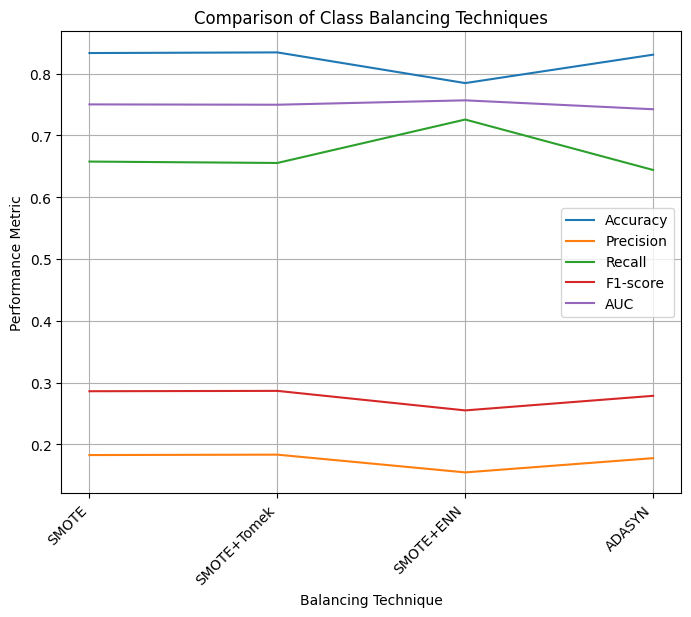

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the 'results' dictionary from your previous snippet

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results).T  # Transpose to have metrics as columns

# Plot the line graph
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
for metric in results_df.columns:
    plt.plot(results_df.index, results_df[metric], label=metric)

plt.title('Comparison of Class Balancing Techniques')
plt.xlabel('Balancing Technique')
plt.ylabel('Performance Metric')
plt.legend(loc='best')
plt.grid()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

**SMOTE** (Synthetic Minority Over-sampling Technique):
Generates synthetic samples for the minority class (bankrupt companies) by interpolating between existing data points.
Effective in improving recall and overall model performance for imbalanced datasets.

In [28]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# 1. Resampling using SMOTE:
smote = SMOTE(random_state=42)  # Initialize SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)  # Resample training data

# 2. Create a new DataFrame with the resampled data:
resampled_data = pd.DataFrame(X_resampled, columns=selected_features)
resampled_data['class'] = y_resampled

In [29]:
print("Class distribution before SMOTE:")
print(y.value_counts())

print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

print("\nResampled data shape:", resampled_data.shape)

Class distribution before SMOTE:
class
0    41314
1     2091
Name: count, dtype: int64

Class distribution after SMOTE:
class
0    33074
1    33074
Name: count, dtype: int64

Resampled data shape: (66148, 27)


**PCA**

In [30]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have 'resampled_data' DataFrame from previous steps

# 1. Standardize the data (important for PCA):
scaler = StandardScaler()
scaled_data = scaler.fit_transform(resampled_data[selected_features])

# 2. Apply PCA:
pca = PCA(n_components=0.95)  # Keep components explaining 95% of variance
principal_components = pca.fit_transform(scaled_data)

# 3. Create a DataFrame with the principal components:
principal_df = pd.DataFrame(data=principal_components,
                            columns=[f"PC{i+1}" for i in range(principal_components.shape[1])])

# 4. Add the target variable to the principal components DataFrame:
principal_df['class'] = resampled_data['class']

# Now 'principal_df' contains your data transformed with PCA and the target variable

<ipython-input-31-89ed806884b7>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['class'], cmap='viridis')


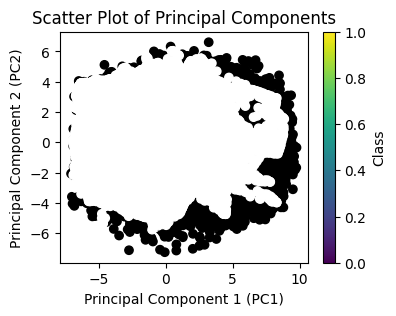

In [31]:
import matplotlib.pyplot as plt

# Assuming you have 'principal_df' DataFrame from previous steps

# Create a scatter plot
plt.figure(figsize=(4, 3))  # Adjust figure size as needed
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['class'], cmap='viridis')
plt.title('Scatter Plot of Principal Components')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.colorbar(label='Class')  # Add a colorbar to show class labels
plt.show()

**MODEL TRAINING USING DIFFERENT MODELS**

Cross-validation is used to get a reliable estimate of model performance.

Confusion matrix helps to understand the types of errors the model is making.

Learning curve provides insights into the model's learning behavior and potential for improvement.

By using these techniques together, you can gain a deeper understanding of your model's strengths and weaknesses, and make informed decisions about model selection, hyperparameter tuning, and data collection strategies.

**What is Random Forest?**

Random Forest is a powerful ensemble learning method used for both classification and regression tasks. It works by constructing multiple decision trees during training and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.

In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split  # Import train_test_split

# Assuming you have principal_df from the PCA step

# 1. Split the data into training and testing sets:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    principal_df.drop('class', axis=1),  # Features (principal components)
    principal_df['class'],  # Target variable
    test_size=0.2,  # Adjust test size as needed
    random_state=42  # Set random state for reproducibility
)

# 2. Initialize and train the Random Forest model:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_pca, y_train_pca)

# 3. Evaluate the model:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label='1'),
        "Recall": recall_score(y_test, y_pred, pos_label='1'),
        "F1-score": f1_score(y_test, y_pred, pos_label='1'),
        "AUC": roc_auc_score(y_test, y_pred)
    }
    return metrics

rf_results = evaluate_model(rf_model, X_test_pca, y_test_pca)

# 4. Store the results in a dictionary:
results = {}  # Initialize the dictionary
results["Random Forest"] = rf_results

# 5. Print the results (optional):
print("Random Forest Results:")
for metric, value in rf_results.items():
    print(f"{metric}: {value:.4f}")

# Now the 'results' dictionary contains the Random Forest results for later comparison.

Random Forest Results:
Accuracy: 0.9559
Precision: 0.9450
Recall: 0.9689
F1-score: 0.9568
AUC: 0.9558


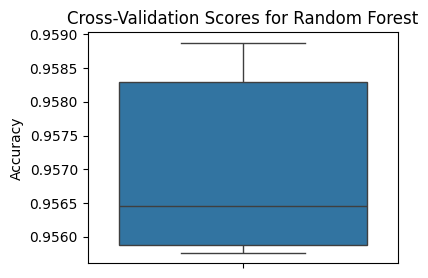

Cross-Validation Scores: [0.95576546 0.95645663 0.95588066 0.95887571 0.95829974]
Average Accuracy: 0.9570556387512958


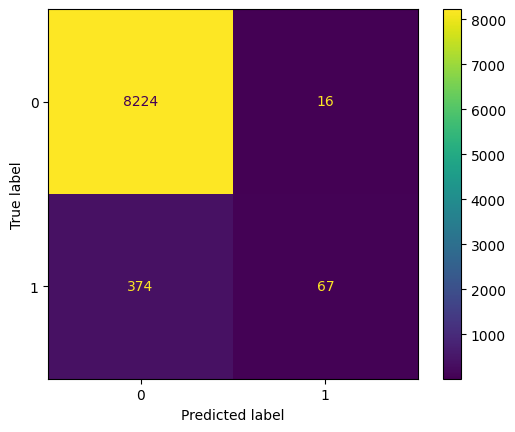

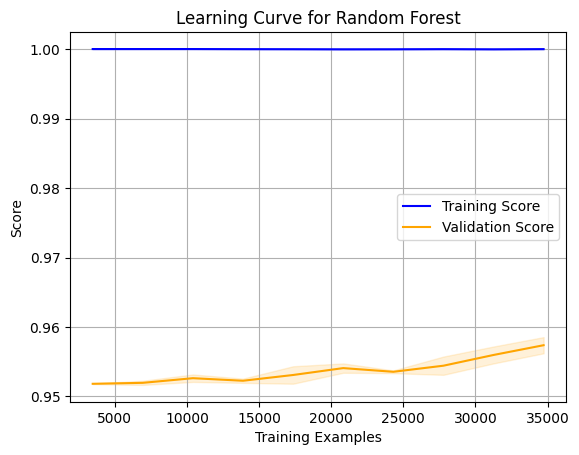

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have X and y (features and target variable)

# 1. Cross-Validation with Box Plot
rf_model = RandomForestClassifier(random_state=42)  # Initialize Random Forest model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, X, y, cv=cv, scoring='accuracy')

# Create a DataFrame for the scores and generate the box plot
scores_df = pd.DataFrame({'Cross-Validation Score': scores})
plt.figure(figsize=(4, 3))
sns.boxplot(y='Cross-Validation Score', data=scores_df)
plt.title('Cross-Validation Scores for Random Forest')
plt.ylabel('Accuracy')
plt.show()

print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

# 2. Confusion Matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot()
plt.show()

# 3. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='orange')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='orange')
plt.title('Learning Curve for Random Forest')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

**What is SVM and How it Works?**

Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for both classification and regression tasks. In the context of your project (bankruptcy prediction), it would be used for classification.

Here's a simplified explanation of how SVM works for classification:

Finding the Optimal Hyperplane: SVM aims to find the best hyperplane (a line in 2D, a plane in 3D, and a hyperplane in higher dimensions) that separates data points of different classes with the largest margin. The margin is the distance between the hyperplane and the nearest data points of each class.
Support Vectors: The data points closest to the hyperplane are called support vectors. These points are crucial in defining the hyperplane and the margin.
Kernel Trick: In cases where data is not linearly separable, SVM uses a "kernel trick" to map the data into a higher-dimensional space where it becomes linearly separable. This allows SVM to handle complex, non-linear relationships in the data.
Classification: Once the optimal hyperplane is found, new data points are classified based on which side of the hyperplane they fall on.

In [34]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split  # If not already imported

# Assuming you have principal_df from the PCA step

# 1. Split the data into training and testing sets (if not already done):
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    principal_df.drop('class', axis=1),  # Features (principal components)
    principal_df['class'],  # Target variable
    test_size=0.2,  # Adjust test size as needed
    random_state=42  # Set random state for reproducibility
)

# 2. Initialize and train the SVM model:
svm_model = SVC(kernel='rbf', random_state=42)  # You can try different kernels like 'linear', 'poly'
svm_model.fit(X_train_pca, y_train_pca)

# 3. Evaluate the model:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label='1'),
        "Recall": recall_score(y_test, y_pred, pos_label='1'),
        "F1-score": f1_score(y_test, y_pred, pos_label='1'),
        "AUC": roc_auc_score(y_test, y_pred)
    }
    return metrics

svm_results = evaluate_model(svm_model, X_test_pca, y_test_pca)

# 4. Store the results in the 'results' dictionary:
results["SVM"] = svm_results  # Assuming you have a 'results' dictionary from before

# 5. Print the results (optional):
print("SVM Results:")
for metric, value in svm_results.items():
    print(f"{metric}: {value:.4f}")

SVM Results:
Accuracy: 0.8670
Precision: 0.8322
Recall: 0.9220
F1-score: 0.8748
AUC: 0.8666


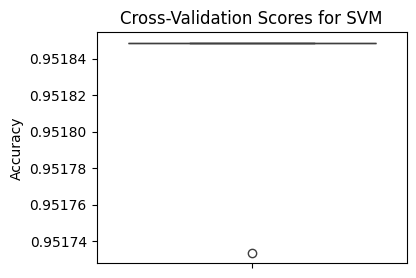

Cross-Validation Scores: [0.95184887 0.95184887 0.95184887 0.95184887 0.95173367]
Average Accuracy: 0.9518258265176822


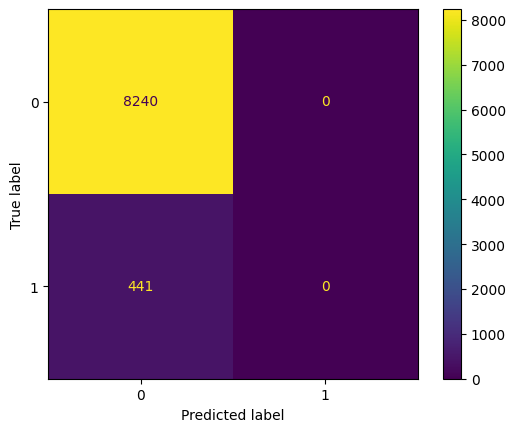

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
6 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py", line 207, in fit
    y = self._validate_targets(y)
        

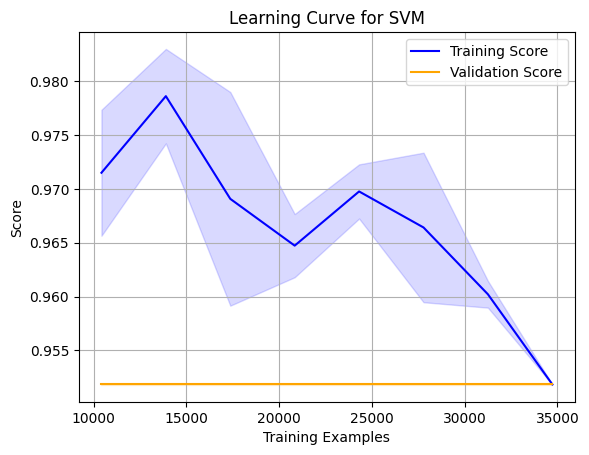

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have X and y (features and target variable)

# 1. Cross-Validation with Box Plot
svm_model = SVC(random_state=42)  # Initialize SVM model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svm_model, X, y, cv=cv, scoring='accuracy')

# Create a DataFrame for the scores and generate the box plot
scores_df = pd.DataFrame({'Cross-Validation Score': scores})
plt.figure(figsize=(4, 3))
sns.boxplot(y='Cross-Validation Score', data=scores_df)
plt.title('Cross-Validation Scores for SVM')
plt.ylabel('Accuracy')
plt.show()

print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

# 2. Confusion Matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot()
plt.show()

# 3. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='orange')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='orange')
plt.title('Learning Curve for SVM')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

**What is Gradient Boosting?**

Gradient Boosting is a powerful ensemble learning technique that builds a predictive model by combining multiple weak learners, typically decision trees. It works sequentially, where each new tree is trained to correct the errors made by the previous trees. This iterative process gradually improves the model's accuracy.

In [36]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split  # If not already imported

# Assuming you have principal_df from the PCA step

# 1. Split the data into training and testing sets (if not already done):
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    principal_df.drop('class', axis=1),  # Features (principal components)
    principal_df['class'],  # Target variable
    test_size=0.2,  # Adjust test size as needed
    random_state=42  # Set random state for reproducibility
)

# 2. Initialize and train the Gradient Boosting model:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_pca, y_train_pca)

# 3. Evaluate the model:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label='1'),
        "Recall": recall_score(y_test, y_pred, pos_label='1'),
        "F1-score": f1_score(y_test, y_pred, pos_label='1'),
        "AUC": roc_auc_score(y_test, y_pred)
    }
    return metrics

gb_results = evaluate_model(gb_model, X_test_pca, y_test_pca)

# 4. Store the results in the 'results' dictionary:
results["Gradient Boosting"] = gb_results  # Assuming you have a 'results' dictionary

# 5. Print the results (optional):
print("Gradient Boosting Results:")
for metric, value in gb_results.items():
    print(f"{metric}: {value:.4f}")

Gradient Boosting Results:
Accuracy: 0.7655
Precision: 0.7555
Recall: 0.7904
F1-score: 0.7725
AUC: 0.7653


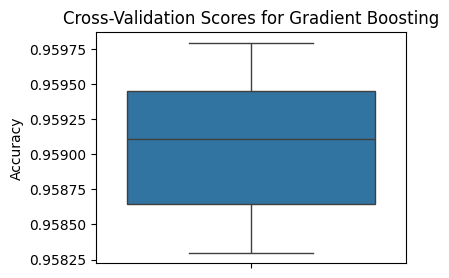

Cross-Validation Scores: [0.95829974 0.95864532 0.95910609 0.95945168 0.95979726]
Average Accuracy: 0.9590600161271743


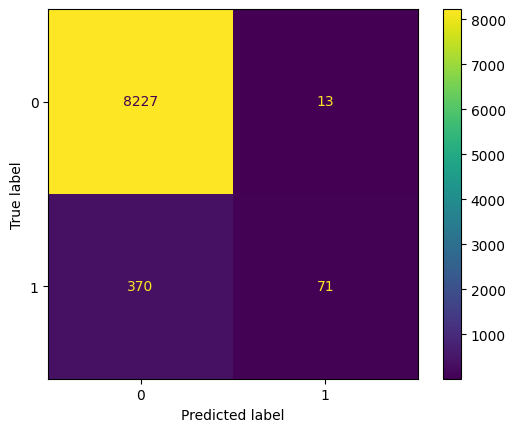

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
6 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py", line 669, in fit
    y = self._encode_y(y=y, sample_weig

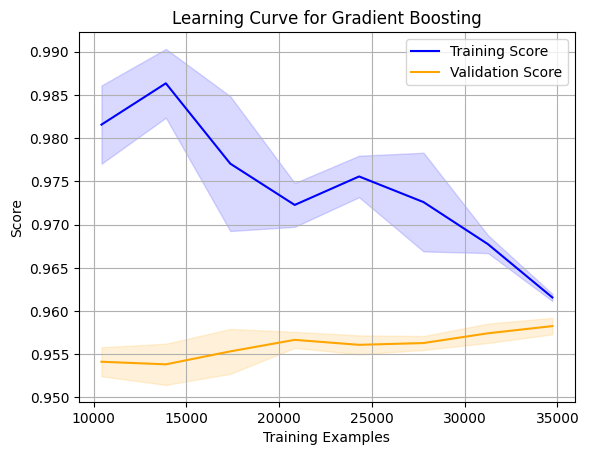

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have X and y (features and target variable)

# 1. Cross-Validation with Box Plot
gb_model = GradientBoostingClassifier(random_state=42)  # Initialize Gradient Boosting model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(gb_model, X, y, cv=cv, scoring='accuracy')

# Create a DataFrame for the scores and generate the box plot
scores_df = pd.DataFrame({'Cross-Validation Score': scores})
plt.figure(figsize=(4, 3))
sns.boxplot(y='Cross-Validation Score', data=scores_df)
plt.title('Cross-Validation Scores for Gradient Boosting')
plt.ylabel('Accuracy')
plt.show()

print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

# 2. Confusion Matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_model.classes_)
disp.plot()
plt.show()

# 3. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    gb_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='orange')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='orange')
plt.title('Learning Curve for Gradient Boosting')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

**What is XGBoost?**

XGBoost (Extreme Gradient Boosting) is a popular and efficient implementation of the gradient boosting algorithm. It's known for its speed, accuracy, and scalability. Like Gradient Boosting, it builds a strong predictive model by combining multiple weak learners (decision trees), but it also includes regularization techniques to prevent overfitting and improve generalization.

In [38]:
!pip install xgboost

In [39]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have principal_df from the PCA step

# 1. Split the data into training and testing sets:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    principal_df.drop('class', axis=1),
    principal_df['class'],
    test_size=0.2,
    random_state=42
)

# Convert the target variable to numeric
y_train_pca = y_train_pca.astype(int)
y_test_pca = y_test_pca.astype(int)

# 2. Initialize and train the XGBoost model:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_pca, y_train_pca)

# 3. Evaluate the model:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, pos_label=1))  # Changed to 1
    print("Recall:", recall_score(y_test, y_pred, pos_label=1))  # Changed to 1
    print("F1-score:", f1_score(y_test, y_pred, pos_label=1))  # Changed to 1
    print("AUC:", roc_auc_score(y_test, y_pred))
    print("-" * 50)
    # Return the evaluation metrics as a dictionary
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label=1),
        "Recall": recall_score(y_test, y_pred, pos_label=1),
        "F1-score": f1_score(y_test, y_pred, pos_label=1),
        "AUC": roc_auc_score(y_test, y_pred)
    }


xgb_results = evaluate_model(xgb_model, X_test_pca, y_test_pca)

# 4. Store the results in the 'results' dictionary:
results["XGBoost"] = xgb_results


              precision    recall  f1-score   support

           0       0.94      0.88      0.91      6565
           1       0.89      0.95      0.92      6665

    accuracy                           0.91     13230
   macro avg       0.91      0.91      0.91     13230
weighted avg       0.91      0.91      0.91     13230

Accuracy: 0.9125472411186697
Precision: 0.8884344146685472
Recall: 0.9450862715678919
F1-score: 0.9158851326790258
AUC: 0.9122994191045858
--------------------------------------------------


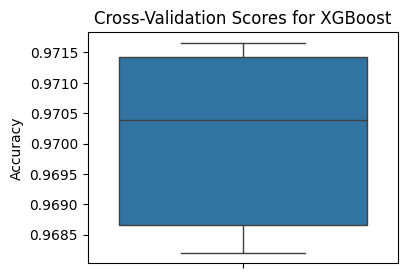

Cross-Validation Scores: [0.97039512 0.96820643 0.9686672  0.97166225 0.97143186]
Average Accuracy: 0.9700725722842991


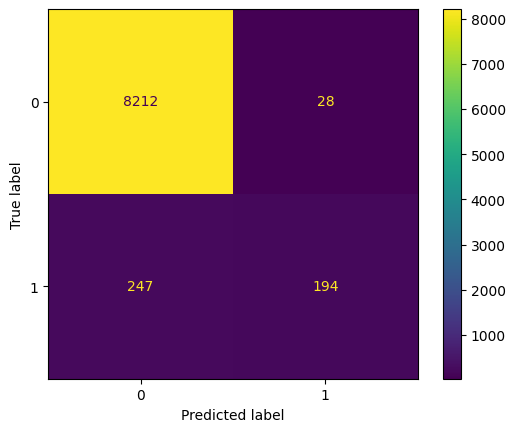

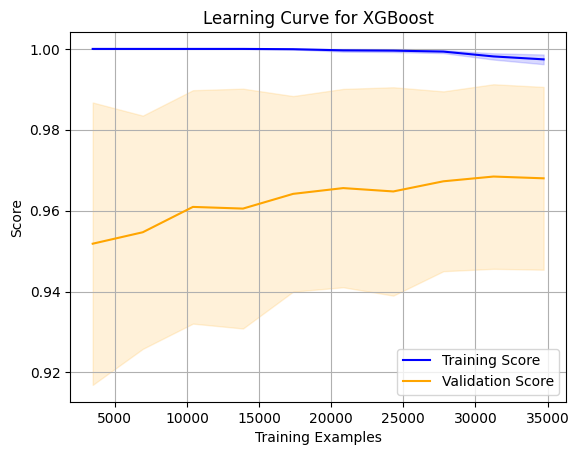

In [40]:
!pip install xgboost
!pip install --upgrade scikit-learn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.base import BaseEstimator, ClassifierMixin  # Import necessary classes for the wrapper

# Create a wrapper class for XGBClassifier
class XGBoostWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, random_state=None, **kwargs):
        self.model = XGBClassifier(random_state=random_state, **kwargs)

    def fit(self, X, y):
        self.model.fit(X, y)
        self.classes_ = self.model.classes_  # Expose classes_ attribute
        return self

    def predict(self, X):
        return self.model.predict(X)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

    def get_params(self, deep=True):
        return self.model.get_params(deep=deep)

    def set_params(self, **params):
        return self.model.set_params(**params)

# Assuming you have X and y (features and target variable)

# 1. Cross-Validation with Box Plot
xgb_model = XGBoostWrapper(random_state=42)  # Use the wrapper class
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Ensure y is numeric
y = pd.to_numeric(y, errors='coerce').fillna(0).astype(int)
scores = cross_val_score(xgb_model, X, y, cv=cv, scoring='accuracy')

# Create a DataFrame for the scores and generate the box plot
scores_df = pd.DataFrame({'Cross-Validation Score': scores})
plt.figure(figsize=(4, 3))
sns.boxplot(y='Cross-Validation Score', data=scores_df)
plt.title('Cross-Validation Scores for XGBoost')
plt.ylabel('Accuracy')
plt.show()

print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

# 2. Confusion Matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_) # Access classes_ from the wrapper
disp.plot()
plt.show()

# 3. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='orange')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='orange')
plt.title('Learning Curve for XGBoost')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

**What is CatBoost?**

CatBoost is a gradient boosting algorithm developed by Yandex. It's known for its ability to handle categorical features effectively without requiring extensive preprocessing, as well as its high accuracy and performance

In [41]:
!pip install catboost  # Install CatBoost if you haven't already


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [42]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Assuming you have principal_df from the PCA step

# 1. Split the data into training and testing sets (if not already done):
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    principal_df.drop('class', axis=1),
    principal_df['class'],
    test_size=0.2,
    random_state=42
)

# 2. Initialize and train the CatBoost model:
catboost_model = CatBoostClassifier(random_seed=42, verbose=0)  # verbose=0 to suppress output
catboost_model.fit(X_train_pca, y_train_pca)

# 3. Evaluate the model:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, pos_label='1'))  # Use '1' as a string
    print("Recall:", recall_score(y_test, y_pred, pos_label='1'))  # Use '1' as a string
    print("F1-score:", f1_score(y_test, y_pred, pos_label='1'))  # Use '1' as a string
    print("AUC:", roc_auc_score(y_test, y_pred))
    print("-" * 50)
    # Return the evaluation metrics as a dictionary
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label='1'),  # Use '1' as a string
        "Recall": recall_score(y_test, y_pred, pos_label='1'),  # Use '1' as a string
        "F1-score": f1_score(y_test, y_pred, pos_label='1'),  # Use '1' as a string
        "AUC": roc_auc_score(y_test, y_pred)
    }


# Call evaluate_model to get the results for CatBoost
catboost_results = evaluate_model(catboost_model, X_test_pca, y_test_pca) #This line was added

# 4. Store the results in the 'results' dictionary:
results["CatBoost"] = catboost_results

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      6565
           1       0.89      0.95      0.92      6665

    accuracy                           0.92     13230
   macro avg       0.92      0.92      0.92     13230
weighted avg       0.92      0.92      0.92     13230

Accuracy: 0.916780045351474
Precision: 0.8905109489051095
Recall: 0.9518379594898725
F1-score: 0.9201537457393575
AUC: 0.9165130391508768
--------------------------------------------------


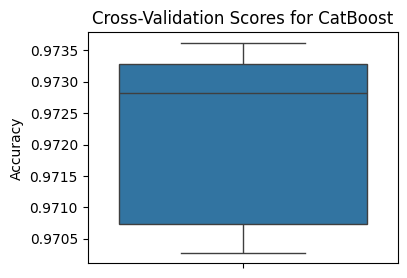

Cross-Validation Scores: [0.97281419 0.9707407  0.97027992 0.97327497 0.97362055]
Average Accuracy: 0.9721460661214145


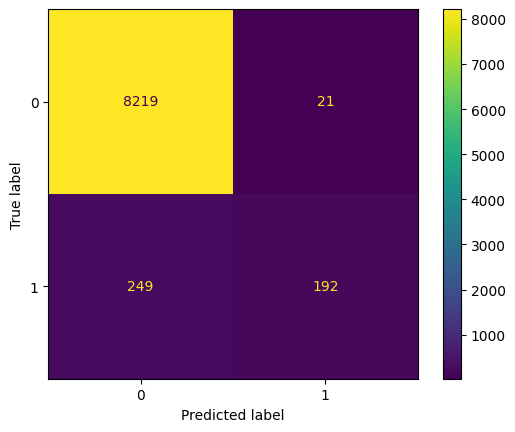

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
6 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/catboost/core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.11/dist-packages/catboost/core.py", line 2410, in _fit


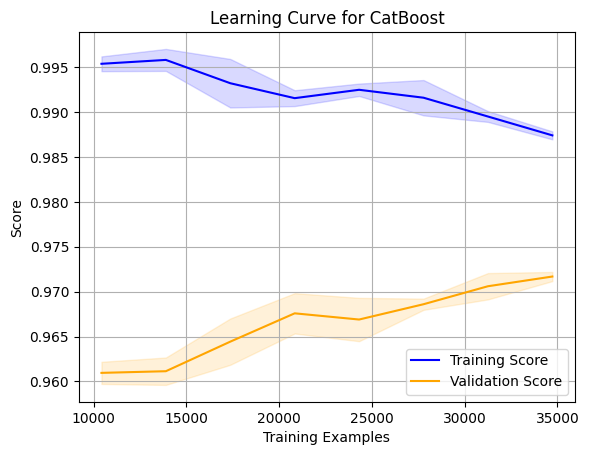

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have X and y (features and target variable)

# 1. Cross-Validation with Box Plot
catboost_model = CatBoostClassifier(random_seed=42, verbose=0)  # Initialize CatBoost model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(catboost_model, X, y, cv=cv, scoring='accuracy')

# Create a DataFrame for the scores and generate the box plot
scores_df = pd.DataFrame({'Cross-Validation Score': scores})
plt.figure(figsize=(4, 3))
sns.boxplot(y='Cross-Validation Score', data=scores_df)
plt.title('Cross-Validation Scores for CatBoost')
plt.ylabel('Accuracy')
plt.show()

print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

# 2. Confusion Matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=catboost_model.classes_)
disp.plot()
plt.show()

# 3. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    catboost_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='orange')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='orange')
plt.title('Learning Curve for CatBoost')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

**What is a Decision Tree?**

A Decision Tree is a supervised learning algorithm that can be used for both classification and regression tasks. It creates a tree-like model where each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label (in classification) or a numerical value (in regression). Decision Trees are easy to understand and interpret but can be prone to overfitting if not carefully tuned.

In [44]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split  # If not already imported

# Assuming you have principal_df from the PCA step

# 1. Split the data into training and testing sets (if not already done):
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    principal_df.drop('class', axis=1),  # Features (principal components)
    principal_df['class'],  # Target variable
    test_size=0.2,  # Adjust test size as needed
    random_state=42  # Set random state for reproducibility
)

# 2. Initialize and train the Decision Tree model:
dt_model = DecisionTreeClassifier(random_state=42)  # Create a DecisionTreeClassifier instance
dt_model.fit(X_train_pca, y_train_pca)  # Train the model

# 3. Evaluate the model:
# (You can reuse the evaluate_model function from previous steps)
dt_results = evaluate_model(dt_model, X_test_pca, y_test_pca)

# 4. Store the results in the 'results' dictionary:
results["Decision Tree"] = dt_results  # Assuming you have a 'results' dictionary

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      6565
           1       0.87      0.91      0.89      6665

    accuracy                           0.89     13230
   macro avg       0.89      0.89      0.89     13230
weighted avg       0.89      0.89      0.89     13230

Accuracy: 0.8857142857142857
Precision: 0.8712001152571676
Recall: 0.9072768192048012
F1-score: 0.8888725562251948
AUC: 0.8855500623061325
--------------------------------------------------


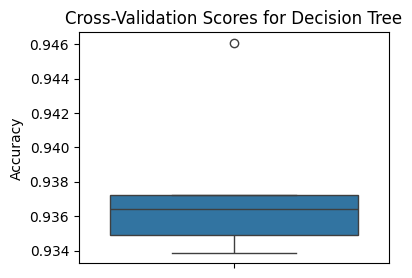

Cross-Validation Scores: [0.93387859 0.93491533 0.93641286 0.94608916 0.93721921]
Average Accuracy: 0.9377030296048842


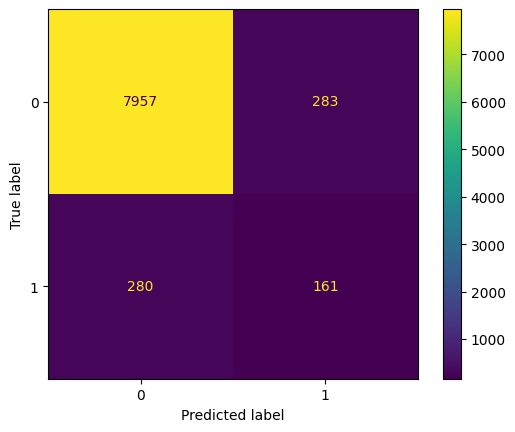

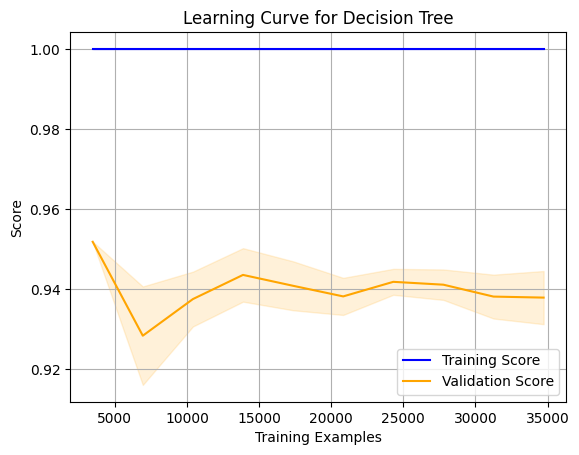

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have X and y (features and target variable)

# 1. Cross-Validation with Box Plot
dt_model = DecisionTreeClassifier(random_state=42)  # Initialize Decision Tree model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(dt_model, X, y, cv=cv, scoring='accuracy')

# Create a DataFrame for the scores and generate the box plot
scores_df = pd.DataFrame({'Cross-Validation Score': scores})
plt.figure(figsize=(4, 3))
sns.boxplot(y='Cross-Validation Score', data=scores_df)
plt.title('Cross-Validation Scores for Decision Tree')
plt.ylabel('Accuracy')
plt.show()

print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

# 2. Confusion Matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot()
plt.show()

# 3. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    dt_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='orange')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='orange')
plt.title('Learning Curve for Decision Tree')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

**What is Logistic Regression?**

Logistic Regression is a statistical model used for binary classification. It predicts the probability of an instance belonging to a particular class (in your case, bankrupt or non-bankrupt). It uses a logistic function to map the output of a linear combination of features to a probability between 0 and 1.

In [46]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split  # If not already imported

# Assuming you have principal_df from the PCA step

# 1. Split the data into training and testing sets (if not already done):
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    principal_df.drop('class', axis=1),  # Features (principal components)
    principal_df['class'],  # Target variable
    test_size=0.2,  # Adjust test size as needed
    random_state=42  # Set random state for reproducibility
)

# 2. Initialize and train the Logistic Regression model:
lr_model = LogisticRegression(random_state=42)  # Create a LogisticRegression instance
lr_model.fit(X_train_pca, y_train_pca)  # Train the model

# 3. Evaluate the model:
# (You can reuse the evaluate_model function from previous steps)
lr_results = evaluate_model(lr_model, X_test_pca, y_test_pca)

# 4. Store the results in the 'results' dictionary:
results["Logistic Regression"] = lr_results  # Assuming you have a 'results' dictionary


              precision    recall  f1-score   support

           0       0.70      0.66      0.68      6565
           1       0.68      0.72      0.70      6665

    accuracy                           0.69     13230
   macro avg       0.69      0.69      0.69     13230
weighted avg       0.69      0.69      0.69     13230

Accuracy: 0.691005291005291
Precision: 0.6835731585695968
Recall: 0.7198799699924981
F1-score: 0.7012569424144987
AUC: 0.6907853772277799
--------------------------------------------------


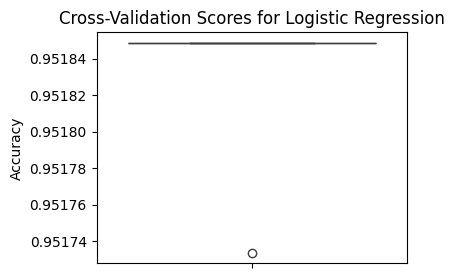

Cross-Validation Scores: [0.95184887 0.95184887 0.95184887 0.95184887 0.95173367]
Average Accuracy: 0.9518258265176822


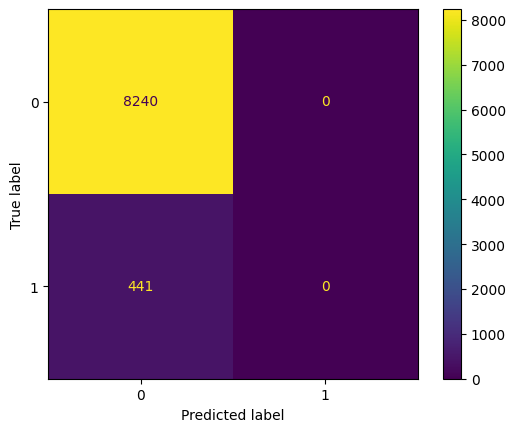

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
6 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
ValueE

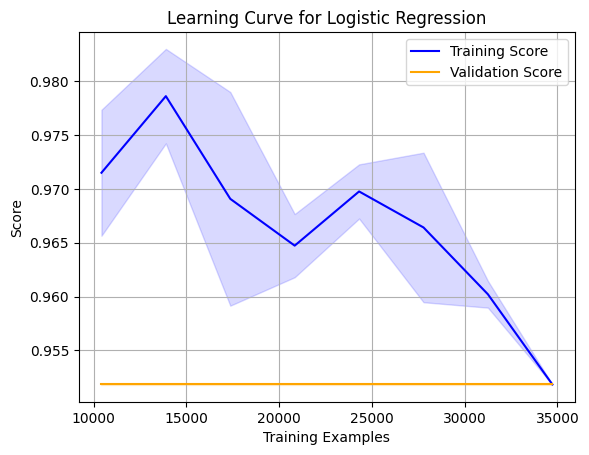

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have X and y (features and target variable)

# 1. Cross-Validation with Box Plot
lr_model = LogisticRegression(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(lr_model, X, y, cv=cv, scoring='accuracy')

# Create a DataFrame for the scores and generate the box plot
scores_df = pd.DataFrame({'Cross-Validation Score': scores})
plt.figure(figsize=(4, 3))
sns.boxplot(y='Cross-Validation Score', data=scores_df)
plt.title('Cross-Validation Scores for Logistic Regression')
plt.ylabel('Accuracy')
plt.show()

print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

# 2. Confusion Matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot()
plt.show()

# 3. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    lr_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='orange')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='orange')
plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

**COMPARING ALL THE 7 MODELS**

In [48]:
import pandas as pd

# Assuming your results are stored in a dictionary like this:
# results = {
#     'Random Forest': {'Accuracy': 0.95, 'Precision': 0.92, ...},
#     'SVM': {'Accuracy': 0.90, 'Precision': 0.88, ...},
#     # ... (other models)
# }

def create_comparison_table(results):
    """Creates a comparison table of model performance metrics.

    Args:
        results (dict): A dictionary where keys are model names and values
                        are dictionaries of evaluation metrics.

    Returns:
        pd.DataFrame: A pandas DataFrame containing the comparison table.
    """

    model_names = list(results.keys())
    metrics = list(results[model_names[0]].keys())

    data = []
    for model_name in model_names:
        row = [model_name] + [results[model_name][metric] for metric in metrics]
        data.append(row)

    comparison_df = pd.DataFrame(data, columns=['Model'] + metrics)
    comparison_df.set_index('Model', inplace=True)  # Set Model as index
    return comparison_df

# Call the function to create and display the table
comparison_table = create_comparison_table(results)
comparison_table

,Accuracy,Precision,Recall,F1-score,AUC
Model,,,,,
Random Forest,0.955933,0.944981,0.968942,0.956812,0.955834
SVM,0.867045,0.832205,0.921980,0.874795,0.866626
Gradient Boosting,0.765533,0.755485,0.790398,0.772547,0.765344
XGBoost,0.912547,0.888434,0.945086,0.915885,0.912299
CatBoost,0.916780,0.890511,0.951838,0.920154,0.916513
Decision Tree,0.885714,0.871200,0.907277,0.888873,0.885550
Logistic Regression,0.691005,0.683573,0.719880,0.701257,0.690785


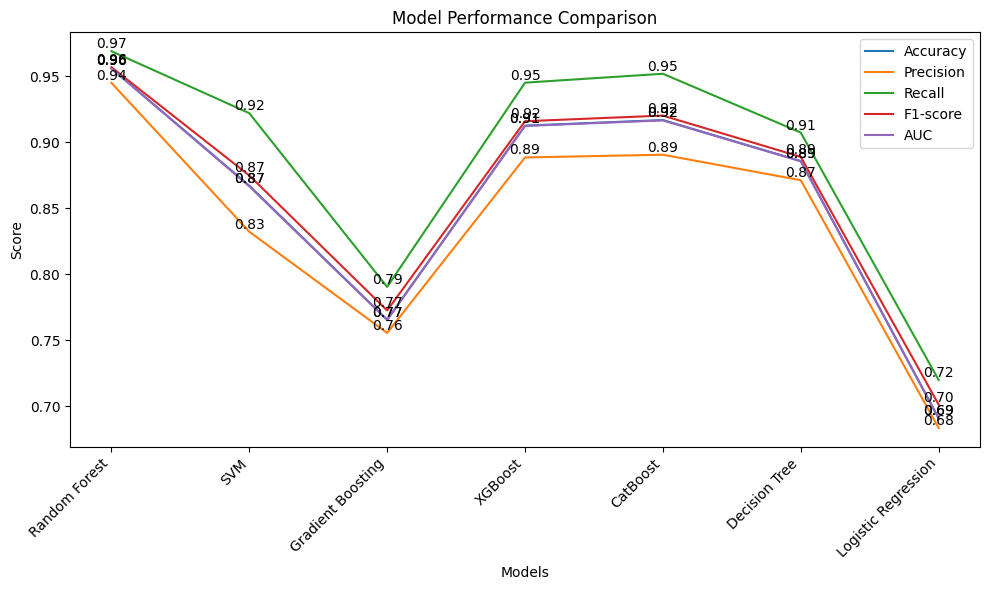

In [49]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_model_comparison(comparison_table):
    """Plots a line graph comparing model performance metrics with values on lines.

    Args:
        comparison_table (pd.DataFrame): The comparison table generated
                                          by create_comparison_table().
    """

    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size as needed

    for metric in comparison_table.columns:
        ax.plot(comparison_table.index, comparison_table[metric], label=metric)
        # Add values to the lines
        for x, y in zip(comparison_table.index, comparison_table[metric]):
            ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')

    ax.set_xlabel("Models")
    ax.set_ylabel("Score")
    ax.set_title("Model Performance Comparison")
    ax.legend(loc='best')  # Adjust legend location as needed
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Call the function to plot the comparison
plot_model_comparison(comparison_table)

**HYPERPARAMETERS TUNNING**

In [50]:
#  This is default hyperparameter tunning

In [51]:
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Assuming you have your data loaded and preprocessed into X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost with default hyperparameters
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Train CatBoost with default hyperparameters
catboost_model = CatBoostClassifier(random_seed=42, verbose=False)  # verbose=False to suppress output
catboost_model.fit(X_train, y_train)


def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)  # Changed to 1 (integer)
    recall = recall_score(y_test, y_pred, pos_label=1)  # Changed to 1 (integer)
    f1 = f1_score(y_test, y_pred, pos_label=1)  # Changed to 1 (integer)
    auc = roc_auc_score(y_test, y_pred)
    return accuracy, precision, recall, f1, auc


xgb_results = evaluate_model(xgb_model, X_test, y_test)
catboost_results = evaluate_model(catboost_model, X_test, y_test)

# Print the baseline performance
print("XGBoost Baseline Performance:")
print(f"Accuracy: {xgb_results[0]:.4f}, Precision: {xgb_results[1]:.4f}, Recall: {xgb_results[2]:.4f}, F1-score: {xgb_results[3]:.4f}, AUC: {xgb_results[4]:.4f}")

print("\nCatBoost Baseline Performance:")
print(f"Accuracy: {catboost_results[0]:.4f}, Precision: {catboost_results[1]:.4f}, Recall: {catboost_results[2]:.4f}, F1-score: {catboost_results[3]:.4f}, AUC: {catboost_results[4]:.4f}")

XGBoost Baseline Performance:
Accuracy: 0.9683, Precision: 0.8739, Recall: 0.4399, F1-score: 0.5852, AUC: 0.7183

CatBoost Baseline Performance:
Accuracy: 0.9689, Precision: 0.9014, Recall: 0.4354, F1-score: 0.5872, AUC: 0.7164


**MODEL EVALUATION**

Accuracy: 0.7983
Precision: 0.7852
Recall: 0.8254
F1-score: 0.8048
AUC: 0.8831


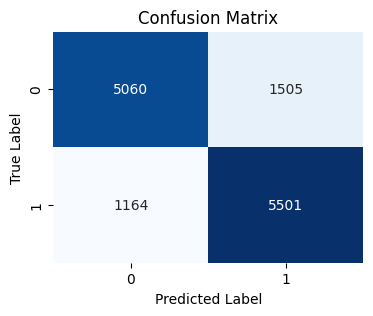

In [52]:
# 1. Import necessary libraries
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Assuming your data is already in a DataFrame named 'dataset':
# Replace 'dataset' with the actual name of your DataFrame if different.
data = principal_df  # Or principal_df, or whatever your DataFrame is called

# 3. Separate features (X) and target (y):
X = data.drop('class', axis=1)  # Replace 'class' with your target variable column name
y = data['class']

# 4. Split data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size as needed

# 5. Create and train your CatBoost model with the best hyperparameters:
# Replace with your actual hyperparameters:
best_iterations = 100
best_learning_rate = 0.1
best_depth = 6
best_l2_leaf_reg = 3

best_model = CatBoostClassifier(
    iterations=best_iterations,
    learning_rate=best_learning_rate,
    depth=best_depth,
    l2_leaf_reg=best_l2_leaf_reg,
    random_state=42,
    verbose=False  # Set to False to suppress output during training
)

best_model.fit(X_train, y_train)

# 6. Model Evaluation:
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (bankruptcy)

# Calculate metrics:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='1')  # Assuming '1' is bankruptcy class
recall = recall_score(y_test, y_pred, pos_label='1')
f1 = f1_score(y_test, y_pred, pos_label='1')
auc = roc_auc_score(y_test, y_pred_proba)

# Print metrics:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**MODEL INTEPRETATION**

   Feature  Importance
0      PC1   23.164739
4      PC5   11.060153
13    PC14   10.235855
7      PC8    8.122230
12    PC13    7.352014
9     PC10    6.606986
11    PC12    5.437808
14    PC15    4.873547
1      PC2    4.825864
2      PC3    4.756540
10    PC11    3.635073
6      PC7    3.181677
8      PC9    2.404478
5      PC6    2.286381
3      PC4    2.056657


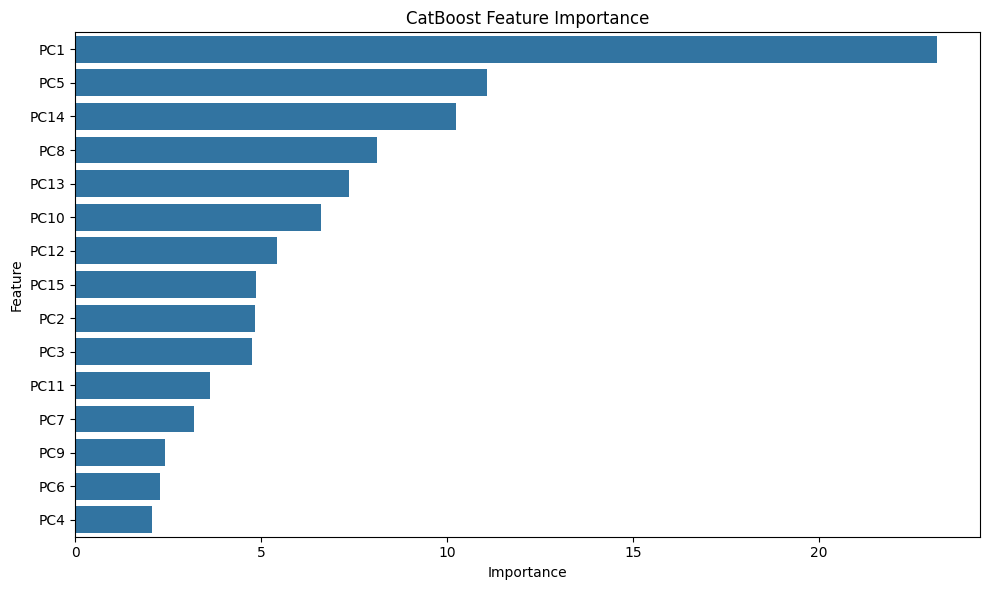

In [53]:
# Get feature importances from the trained CatBoost model
importances = best_model.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importance DataFrame
print(feature_importance_df)

# (Optional) Visualize feature importance using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('CatBoost Feature Importance')
plt.tight_layout()
plt.show()

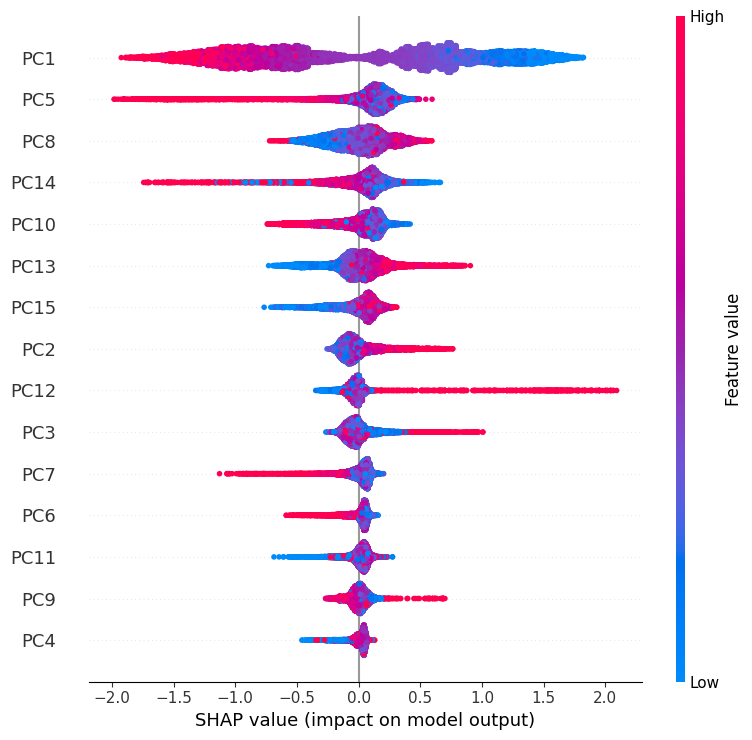

In [54]:
# Install SHAP if you haven't already
!pip install shap

# Import SHAP
import shap

# Create a TreeExplainer for your CatBoost model
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values for your test data
shap_values = explainer.shap_values(X_test)

# Summary plot to visualize overall feature importance and impact
shap.summary_plot(shap_values, X_test)

# (Optional) Dependence plots to visualize feature interactions
# shap.dependence_plot("feature_name", shap_values, X_test)  # Replace "feature_name"

**Testing**

In [55]:
import pandas as pd

## Prediction Output

# Input data


company_data =principal_df

# Prepare data for prediction using 'newset' with selected features and 'class'
X = newset[selected_features]
y = newset['class']

# Prediction using your trained CatBoost model (best_model)
prediction = best_model.predict(company_data)
print("Prediction:", prediction[0])

# Interpretation of the prediction

if prediction[0] == 1:
    print("The model predicts that the company is likely to go bankrupt.")
else:
    print("The model predicts that the company is not likely to go bankrupt.")



Prediction: 0
The model predicts that the company is not likely to go bankrupt.


In [59]:
len(prediction)

66148

**DEPLOYMENT**

In [61]:
!pip freeze > requirements.txt

In [62]:
import joblib

   # Replace 'your_model_variable' with the actual name of your trained model object
joblib.dump(best_model, 'bankruptcy_prediction_model.pkl')


['bankruptcy_prediction_model.pkl']